<h2 style='text-align:center'><b> Supermarket Customer</b></h1>
<h5 style="text-align: center;"> Ilham Taufieq Julfianto        - JCDS-0410-002</h2>

<a id="numerical"></a>
# <b>Section 1 |</span> Introduction</span></b>

____

<a id="basic"></a>
### <b>About the Company</span></b>

Supermarket ABC was founded in 2005 by Alex Johnson. Starting with a simple mission to provide the best shopping experience with a focus on customer needs, Supermarket ABC has grown from a small local store into a network of supermarkets offering a wide range of products. We emphasize quality, convenience, and exceptional customer service to ensure that every visit to our stores is enjoyable.

With core values such as trust, innovation, and community involvement, we continually enhance our offerings. Our vision is to be a leading supermarket chain known for our commitment to customer satisfaction and our ability to adapt to evolving needs. We strive to set the standard for retail excellence and build a loyal customer base through our dedication to quality and service.

<a id="basic"></a>
### <b>Business Context</b>


The retail industry, particularly the supermarket sector, acts as an important link between producers and consumers by offering a variety of daily necessities in one location. However, supermarkets face significant challenges due to changes in consumer behaviour and preferences, especially with the rise of e-commerce. To remain competitive, supermarkets need to gain a deep understanding of customer behaviour and preferences. Customer segmentation and personality analysis enable supermarkets to tailor products, prices, and marketing strategies to meet the needs of different segments and overcome the challenges faced in this dynamic business environment.

<a id="basic"></a>
### <b> Bussiness Task</span></b>

ABC Supermarket wanted to increase sales by product category through a better understanding of customer buying behaviour. The specific problem at hand was how to identify the best-selling product categories, understand the factors that influence purchases by product category, and develop effective promotional strategies to increase sales. So, the critical questions it sought to answer were:

1. What product categories are most frequently purchased by customers?
2. What factors influence purchasing decisions by product category by customers?
3. What are the customer patterns based on product category purchases?
4. How is the effectiveness of current promotions towards increasing sales of specific products?

The analysis will cover customer data from July 2012 to June 2014, focusing on purchasing behaviour, promotion effectiveness, and customer segmentation. The success of the analysis will be determined by the actionable insights and the impact on increasing sales. Specifically, we aim to achieve an increase in sales of specific product categories by at least 15% within the next year after strategy implementation, promotion effectiveness by increasing promotion conversion by 10% compared to the previous period.

<a id="basic"></a>
### <b>Scenario</span></b>

Key stakeholders for this analysis include:

1. Chief Marketing Officer (CMO): Responsible for the overall marketing strategy.
2. Operations Manager: In charge of ensuring product availability in accordance with the demand identified from the analysis results.
3. Customer Service Team: Tasked with providing valuable insights into customer satisfaction, problems, and preferences that can be used in consumer behaviour analysis to support decision-making.

It is assumed that data is accurate and complete, market conditions are stable, customer behaviour is consistent, promotional effectiveness is documented and supported by adequate technology.

<a id="numerical"></a>
# <b>Section 2 | Data Examination</b>

____


## <b>Import Library</b>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

import warnings
warnings.filterwarnings("ignore")

## <b>Import Dataset</b>

In [42]:
data =pd.read_csv('Supermarket_Customers.csv', delimiter='\t')
pd.options.display.max_columns=50
pd.options.display.max_rows=100

# Melihat 5 baris pertama data
df = data.copy()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## Information about the column

This dataset contains information related to customer, product, promotion, and venue information as well as cost and revenue. There are 29 columns in the supermarket customer dataset, namely:  

<table border="1">
  <tr align="center">
    <td colspan="2"><b>People</b></td>
  </tr>
  <tr>
    <td><b>Column</b></td>
    <td><b>Description</b></td>
  </tr>
  <tr>
    <td>ID</td>
    <td>Customer's unique identifier</td>
  </tr>
  <tr>
    <td>Year_Birth</td>
    <td>Customer's birth year</td>
  </tr>
  <tr>
    <td>Education</td>
    <td>Customer's education level</td>
  </tr>
  <tr>
    <td>Marital_Status</td>
    <td>Customer's marital status</td>
  </tr>
  <tr>
    <td>Income</td>
    <td>Customer's yearly household income</td>
  </tr>
  <tr>
    <td>Kidhome</td>
    <td>Number of children in customer's household</td>
  </tr>
  <tr>
    <td>Teenhome</td>
    <td>Number of teenagers in customer's household</td>
  </tr>
  <tr>
    <td>Dt_Customer</td>
    <td>Date of customer's enrollment with the company</td>
  </tr>
  <tr>
    <td>Recency</td>
    <td>Number of days since customer's last purchase</td>
  </tr>
  <tr>
    <td>Complain</td>
    <td>1 if the customer complained in the last 2 years, 0 otherwise</td>
  </tr></table><br>
  <table>
  <tr align="center">
    <td colspan="2"><b>Products</b></td>
  </tr>
  <tr>
    <td><b>Column</b></td>
    <td><b>Description</b></td>
  </tr>
  <tr>
    <td>MntWines</td>
    <td>Amount spent on wine in last 2 years</td>
  </tr>
  <tr>
    <td>MntFruits</td>
    <td>Amount spent on fruits in last 2 years</td>
  </tr>
  <tr>
    <td>MntMeatProducts</td>
    <td>Amount spent on meat in last 2 years</td>
  </tr>
  <tr>
    <td>MntFishProducts</td>
    <td>Amount spent on fish in last 2 years</td>
  </tr>
  <tr>
    <td>MntSweetProducts</td>
    <td>Amount spent on sweets in last 2 years</td>
  </tr>
  <tr>
    <td>MntGoldProds</td>
    <td>Amount spent on gold in last 2 years</td>
  </tr></table><br>
  <table>
  <tr align="center">
    <td colspan="2"><b>Promotion</b></td>
  </tr>
  <tr>
    <td><b>Column</b></td>
    <td><b>Description</b></td>
  </tr>
  <tr>
    <td>NumDealsPurchases</td>
    <td>Number of purchases made with a discount</td>
  </tr>
  <tr>
    <td>AcceptedCmp1</td>
    <td>1 if the customer accepted the offer in the 1st campaign, 0 otherwise</td>
  </tr>
  <tr>
    <td>AcceptedCmp2</td>
    <td>1 if the customer accepted the offer in the 2nd campaign, 0 otherwise</td>
  </tr>
  <tr>
    <td>AcceptedCmp3</td>
    <td>1 if the customer accepted the offer in the 3rd campaign, 0 otherwise</td>
  </tr>
  <tr>
    <td>AcceptedCmp4</td>
    <td>1 if the customer accepted the offer in the 4th campaign, 0 otherwise</td>
  </tr>
  <tr>
    <td>AcceptedCmp5</td>
    <td>1 if the customer accepted the offer in the 5th campaign, 0 otherwise</td>
  </tr>
  <tr>
    <td>Response</td>
    <td>1 if the customer accepted the offer in the last campaign, 0 otherwise</td>
  </tr></table><br>
  <table>
  <tr align="center">
    <td colspan="2"><b>Place</b></td>
  </tr>
  <tr>
    <td><b>Column</b></td>
    <td><b>Description</b></td>
  </tr>
  <tr>
    <td>NumWebPurchases</td>
    <td>Number of purchases made through the company’s website</td>
  </tr>
  <tr>
    <td>NumCatalogPurchases</td>
    <td>Number of purchases made using a catalog</td>
  </tr>
  <tr>
    <td>NumStorePurchases</td>
    <td>Number of purchases made directly in stores</td>
  </tr>
  <tr>
    <td>NumWebVisitsMonth</td>
    <td>Number of visits to the company’s website in the last month</td>
  </tr>
</table>
<br>
  <table>
  <tr align="center">
    <td colspan="2"><b>Cost and Revenue</b></td>
  </tr>
  <tr>
    <td><b>Column</b></td>
    <td><b>Description</b></td>
  </tr>
  <tr>
    <td>Z_CostContact</td>
    <td>cost to contact a customer</td>
  </tr>  <tr>
    <td>Z_Revenue</td>
    <td>Revenue after client accepting campaign</td>
  </tr>
</table>

## Data Size: Amount and Range

In understanding the type, shape and size of data by examining the quantitative attributes of variables and items. Statistical methods can be used to describe the physical characteristics of the data

- ### Descriptive statistics

In [43]:
display(df.describe().T, df.describe(include='object'))

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


The data presented includes descriptive statistics for various numerical and categorical columns in a dataset of 2,240 rows. For numeric columns, the information provided includes the mean, standard deviation, minimum value, quartiles (25%, 50%, 75%), and maximum value. For example, the 'Income' column has an average of about 52,247 with a standard deviation of 25,173, and a very wide range of values from 1,730 to 666,666. The 'Recency' column shows an average of 49.11 with a standard deviation of 28.96. Meanwhile, categorical data such as 'Education' has five unique values with 'Graduation' as the most frequently occurring value 1,127 times, 'Marital_Status' shows eight marital statuses with 'Married' as the most common, and the date column 'Dt_Customer' has 663 unique dates with the date '31-08-2012' as the most frequently occurring 12 times.

- ### Inferential Statistics
To perform inferential statistical analysis, that is, using several statistical tests in accordance with the purpose of the analysis

- #### Normality test

Before conducting further analyses, it is important to check whether the data is normally distributed. In this case, the Shapiro-Wilk test will be used to test the normality of the data as this test is very sensitive to deviations from the normal distribution, especially at small to medium sample sizes, and provides accurate results in assessing whether the data follows a normal distribution or not.

In [44]:
# Selecting a numeric column
numerical_columns = [
    'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'
]

# Perform the Shapiro-Wilk test for normality
normality_results = {}
for column in numerical_columns:
    # Removes NaN values if any
    column_data = df[column].dropna()
    if len(column_data) < 3:
        # Shapiro-Wilk test requires a minimum of 3 data points
        stat, p_value = float('nan'), float('nan')
        interpretation = "Number of data less than 3, test cannot be performed"
    else:
        stat, p_value = shapiro(column_data)
        # Interpretasi p-value
        if p_value < 0.05:
            interpretation = "Data is not normally distributed"
        else:
            interpretation = "Data is normally distributed"
    
    normality_results[column] = {'Statistic': stat, 'p-value': p_value, 'Interpretation': interpretation}

# Convert test results to DataFrame for a neater look
normality_df = pd.DataFrame(normality_results).T

# Format values with 6 digits behind a comma
normality_df = normality_df.applymap(lambda x: f"{x:.3e}" if isinstance(x, float) else x)

# Displaying results
print(normality_df)

                     Statistic    p-value                    Interpretation
Income               7.771e-01  0.000e+00  Data is not normally distributed
Recency              9.541e-01  5.698e-26  Data is not normally distributed
MntWines             8.381e-01  5.703e-43  Data is not normally distributed
MntFruits            6.891e-01  0.000e+00  Data is not normally distributed
MntMeatProducts      7.298e-01  0.000e+00  Data is not normally distributed
MntFishProducts      7.086e-01  0.000e+00  Data is not normally distributed
MntSweetProducts     6.867e-01  0.000e+00  Data is not normally distributed
MntGoldProds         7.671e-01  0.000e+00  Data is not normally distributed
NumDealsPurchases    7.398e-01  0.000e+00  Data is not normally distributed
NumWebPurchases      8.979e-01  3.070e-36  Data is not normally distributed
NumCatalogPurchases  8.149e-01  4.204e-45  Data is not normally distributed
NumStorePurchases    9.045e-01  2.591e-35  Data is not normally distributed
NumWebVisits

Based on the results of the Shapiro-Wilk test applied to the various numerical columns, it can be concluded that all the variables tested are not normally distributed. The p-value for each column is very small, well below the general significance limit of 0.05, This is reflected in the test statistic results which show that the distribution of the data does not conform to a normal distribution for all columns tested.

The implication of these results is that statistical analysis techniques that assume normality, such as the t-test or ANOVA, may not be appropriate for these data. Alternatively, the use of non-parametric tests that do not require the assumption of normal distribution may be considered. In addition, data transformation may be required to approximate a normal distribution, or the use of data visualisations such as histograms and box plots may help further understand the shape of the data distribution.

- ### Data Distribution

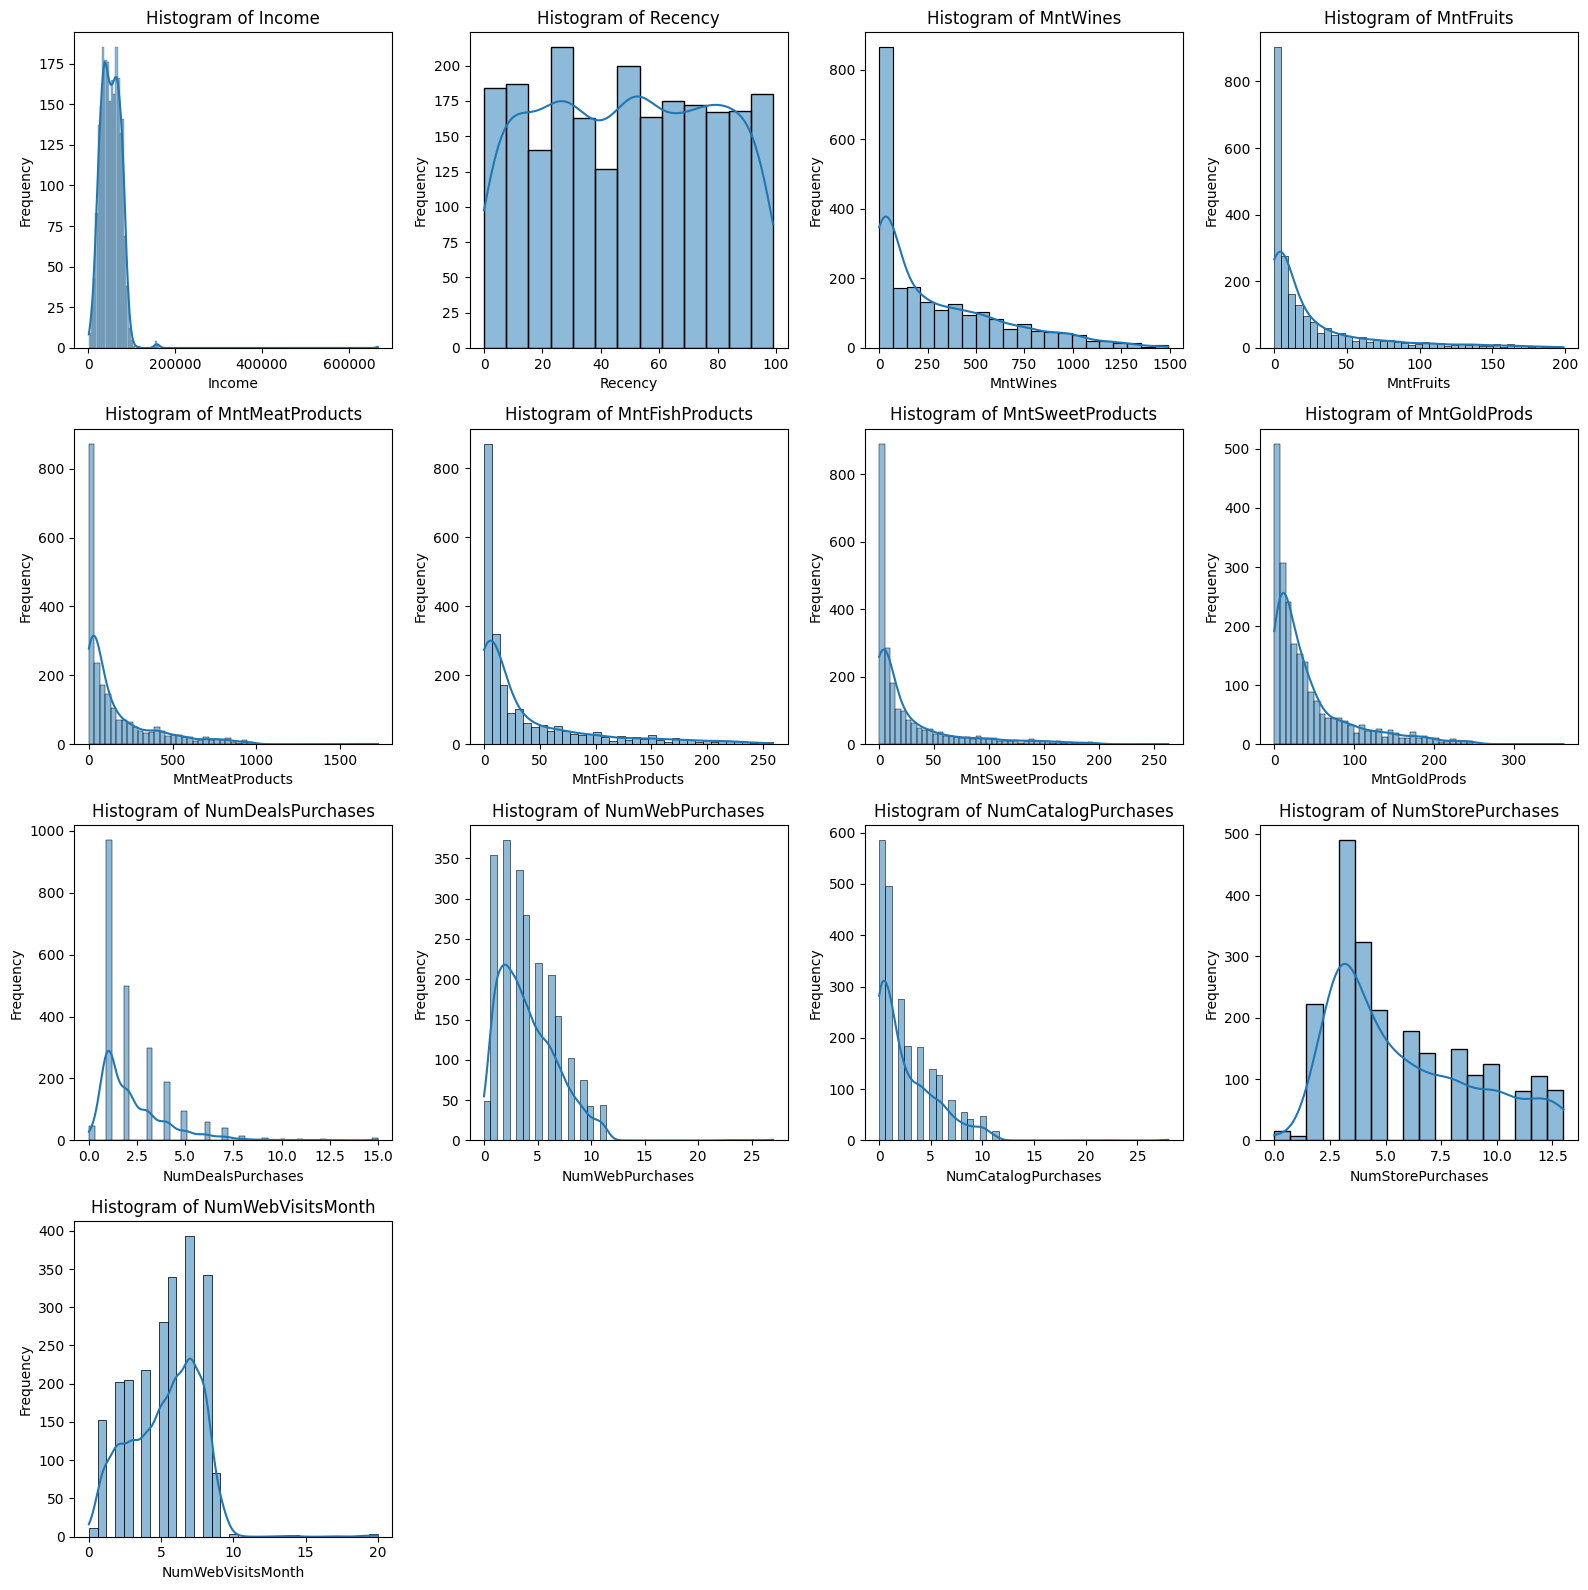

In [45]:
# List of numerical columns
numerical_columns = [
    'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'
]

plt.figure(figsize=(16, 16))
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The histograms above show a distribution of customer data that is mostly right-skewed. This means that most of the data values are on the left side or below the mean so the distribution of data in the histograms above is not normal.

## Data Condition: Quality and Representativeness

- ### Number of rows and columns

In [46]:
print(f'\nThe number of rows is {df.shape[0]} and columns is {df.shape[1]} in the dataset')
df.info()


The number of rows is 2240 and columns is 29 in the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 n

From the analysis that has been done, the majority of column data types are correct. However, it needs to be corrected that the `Dt_Customer` column currently has an object data type, while it should be a datetime data type.

- ### Missing Value 

In [47]:
# percentage and number of missing values in each column
missingData = (df.isna().mean() * 100).to_frame().rename(columns={'index':'columns', 0:'percent'})
missingData['count'] = df.isna().sum()
missingData['percent'] = round(missingData['percent'], 2).astype('str') + '%'
missingData = missingData.reset_index(names='column')
missingData

,column,percent,count
0,ID,0.0%,0
1,Year_Birth,0.0%,0
2,Education,0.0%,0
3,Marital_Status,0.0%,0
4,Income,1.07%,24
5,Kidhome,0.0%,0
6,Teenhome,0.0%,0
7,Dt_Customer,0.0%,0
8,Recency,0.0%,0
9,MntWines,0.0%,0


<Axes: >

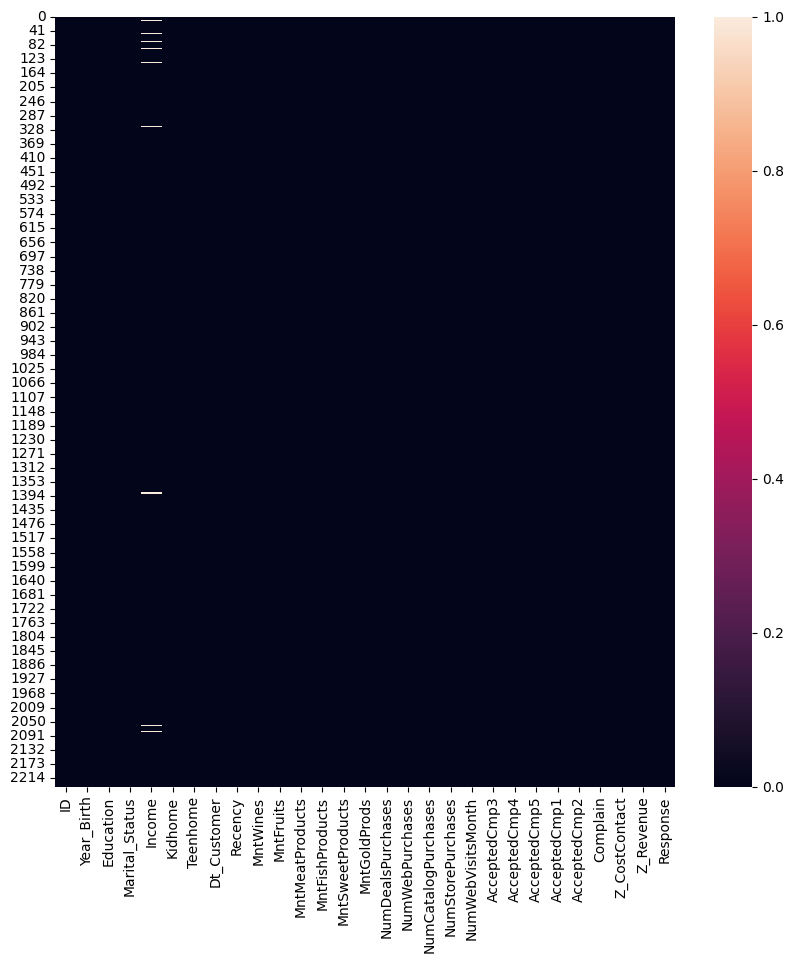

In [48]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

There are Missing Values in the Income column as much as 1.07% of the total data. This is equivalent to 24 rows that have no value in the column. This means that out of all the rows, there are 24 rows that have not been filled with information about Income.

- ### Duplicate values

In [49]:
duplicate_counts = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_counts}')

Number of duplicate rows: 0


There are no duplicate values in DataFrame columns. Each value in a column is unique.

- ### View unique values 

In [50]:
pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'nunique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

,feature,data_type,nunique,sample_unique
0,ID,int64,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,Year_Birth,int64,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
2,Education,object,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,object,8,"[Single, Together, Married, Divorced, Widow, A..."
4,Income,float64,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
5,Kidhome,int64,3,"[0, 1, 2]"
6,Teenhome,int64,3,"[0, 1, 2]"
7,Dt_Customer,object,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-201..."
8,Recency,int64,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8..."
9,MntWines,int64,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6..."


- Column Explanation
    * `ID` : Data type is **int64**, with `2240` unique Value
    * `Year_Birth` : Data type is **int64**, with `59` unique value
    * `Education` : Data type is **object**, with `5` unique value
    * `Marital_Status` : Data type is **object**, with `8` unique value
    * `Income` : Data type is **float64**, with `1974` unique value
    * `Kidhome` : Data type is **int64**, with `3` unique value
    * `Teenhome` : Data type is **int64**, with `3` unique value
    * `Dt_Customer` : Data type is **object**, with `663` unique value
    * `Recency` : Data type is **int64**, with `100` unique value
    * `MntWines` : Data type is **int64**, with `776` unique value
    * `MntFruits` : Data type is **int64**, with `158` unique value
    * `MntMeatProducts` : Data type is **int64**, with `558` unique value
    * `MntFishProducts` : Data type is **int64**, with `182` unique value
    * `MntSweetProducts` : Data type is **int64**, with `177` unique value
    * `MntGoldProds` : Data type is **int64**, with `213` unique value
    * `NumDealsPurchases` : Data type is **int64**, with `15` unique value
    * `NumWebPurchases` : Data type is **int64**, with `15` unique value
    * `NumCatalogPurchases` : Data type is **int64**, with `14` unique value
    * `NumStorePurchases` : Data type is **int64**, with `14` unique value
    * `NumWebVisitsMonth` : Data type is **int64**, with `16` unique value
    * `AcceptedCmp3` : Data type is **int64**, with `2` unique value
    * `AcceptedCmp4` : Data type is **int64**, with `2` unique value
    * `AcceptedCmp5` : Data type is **int64**, with `2` unique value
    * `AcceptedCmp1` : Data type is **int64**, with `2` unique value
    * `AcceptedCmp2` : Data type is **int64**, with `2` unique value
    * `Complain` : Data type is **int64**, with `2` unique value
    * `Z_CostContact` : Data type is **int64**, with `1` unique value
    * `Z_Revenue` : Data type is **int64**, with `1` unique value
    * `Response`: Data type is **int64**, with `2` unique value

#### Anomalies
- Outliers

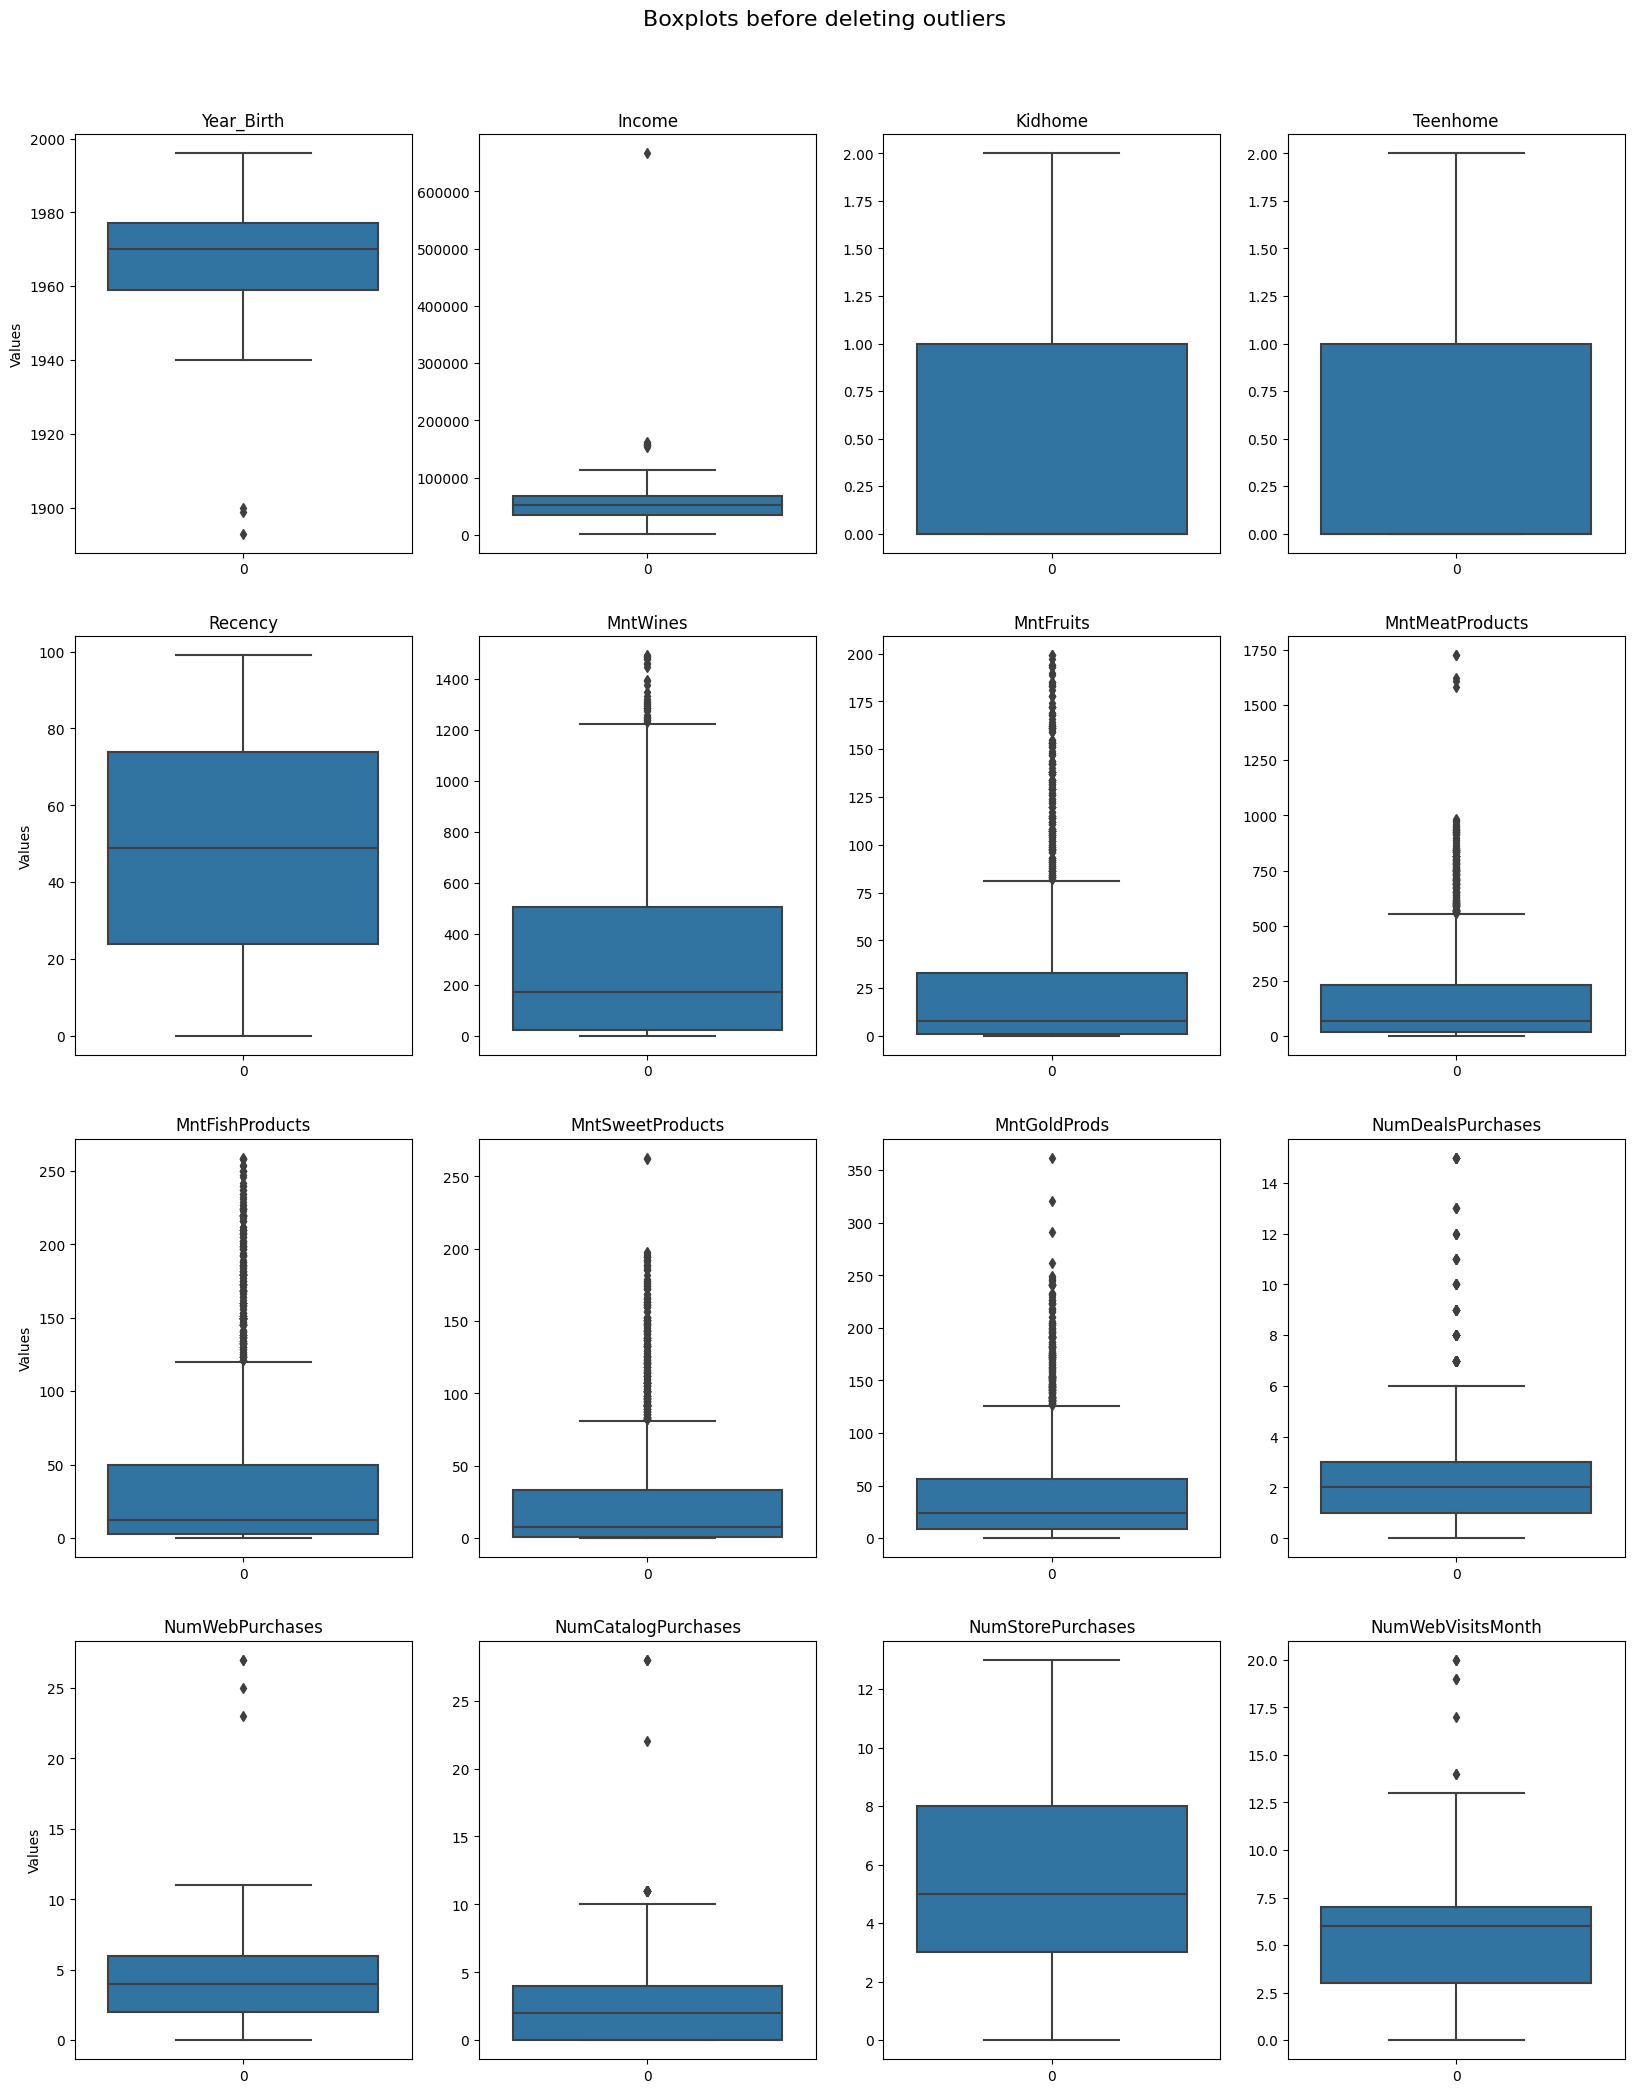

In [51]:
#list numeric columns of the data set
numeric_columns = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

def boxplots_custom(dataset, columns_list, rows, cols, suptitle,size=(20,25)):
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot( data=dataset[data], orient='v', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=4, cols=4, suptitle='Boxplots before deleting outliers')

In [52]:
def Check_Outliers(df, numeric_columns):
    df_outliers = {}
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Upper_fence = Q3 + (1.5 * IQR)
        Lower_fence = Q1 - (1.5 * IQR)
        outliers = df[(df[col] < Lower_fence) | (df[col] > Upper_fence)]
        df_outliers[col] = outliers
    return df_outliers


outliers_iqr = Check_Outliers(df, numeric_columns)
for col, outlier_df in outliers_iqr.items():
    print(f"Number of outliers in (\033[4m{col}\033[0m) is (\033[4m{len(outlier_df)}\033[0m) and proportion of total data is (\033[4m{round(len(outlier_df)/len(df)*100, 2)}%\033[0m)")


Number of outliers in (Year_Birth) is (3) and proportion of total data is (0.13%)
Number of outliers in (Income) is (8) and proportion of total data is (0.36%)
Number of outliers in (Kidhome) is (0) and proportion of total data is (0.0%)
Number of outliers in (Teenhome) is (0) and proportion of total data is (0.0%)
Number of outliers in (Recency) is (0) and proportion of total data is (0.0%)
Number of outliers in (MntWines) is (35) and proportion of total data is (1.56%)
Number of outliers in (MntFruits) is (227) and proportion of total data is (10.13%)
Number of outliers in (MntMeatProducts) is (175) and proportion of total data is (7.81%)
Number of outliers in (MntFishProducts) is (223) and proportion of total data is (9.96%)
Number of outliers in (MntSweetProducts) is (248) and proportion of total data is (11.07%)
Number of outliers in (MntGoldProds) is (207) and proportion of total data is (9.24%)
Number of outliers in (NumDealsPurchases) is (86) and proportion of total data is (3.

<a id="numerik"></a>
<h1><b>Section 3 | Data Transformation</b></h1>

____

After examining the data, the steps that need to be taken to prepare it become clear. There are three main types of activities in data transformation: cleaning, creating, and consolidating. To ensure accurate results, record all changes made and be ready to explain the reasoning behind any modifications, assumptions, or calculations applied to the data.

## Data Cleaning

- <b>Handling Missing Values</b>

In [53]:
df['Income'].fillna(df['Income'].median(),inplace=True)

Because the number of missing values in the Income data is only about 1% of the total data, it was decided to fill the missing values with the median of the Income column. The use of the median as an imputation method was chosen because the median is more resistant to outliers than the mean, thus providing a more stable and representative estimate for data that may not have a normal distribution.

Rechecking missing values from the data

In [54]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

- ### Handling Data Format Issues

In [55]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

Rechecking the data format

In [56]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

- ### Handling Outliers

In [57]:
# Columns to handle
columns_to_check = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 
             'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
             'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
             'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
             'NumWebVisitsMonth']


def handle_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Determine the lower and upper bounds for outliers
        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[col] < lower_fence) | (df[col] > upper_fence)]
        
        # Handle outliers by replacing them with upper_fence or lower_fence
        df[col] = np.where(df[col] < lower_fence, lower_fence, df[col])
        df[col] = np.where(df[col] > upper_fence, upper_fence, df[col])


handle_outliers(df, columns_to_check)


Handling outliers in this case if a value is above the upper fence, it will be replaced with the upper fence value. Conversely, if a value is below the lower fence, it will be replaced with the lower fence value.

- rechecking outliers

In [58]:
def Check_Outliers(df, numeric_columns):
    df_outliers = {}
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Upper_fence = Q3 + (1.5 * IQR)
        Lower_fence = Q1 - (1.5 * IQR)
        outliers = df[(df[col] < Lower_fence) | (df[col] > Upper_fence)]
        df_outliers[col] = outliers
    return df_outliers


outliers_iqr = Check_Outliers(df, numeric_columns)
for col, outlier_df in outliers_iqr.items():
    print(f"Current number of outliers in (\033[4m{col}\033[0m) is (\033[4m{len(outlier_df)}\033[0m) and the proportion relative to the total data is (\033[4m{round(len(outlier_df)/len(df)*100, 2)}%\033[0m)")


Current number of outliers in (Year_Birth) is (0) and the proportion relative to the total data is (0.0%)
Current number of outliers in (Income) is (0) and the proportion relative to the total data is (0.0%)
Current number of outliers in (Kidhome) is (0) and the proportion relative to the total data is (0.0%)
Current number of outliers in (Teenhome) is (0) and the proportion relative to the total data is (0.0%)
Current number of outliers in (Recency) is (0) and the proportion relative to the total data is (0.0%)
Current number of outliers in (MntWines) is (0) and the proportion relative to the total data is (0.0%)
Current number of outliers in (MntFruits) is (0) and the proportion relative to the total data is (0.0%)
Current number of outliers in (MntMeatProducts) is (0) and the proportion relative to the total data is (0.0%)
Current number of outliers in (MntFishProducts) is (0) and the proportion relative to the total data is (0.0%)
Current number of outliers in (MntSweetProducts) is

- #### Removing irrelevant fields

In [59]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [60]:
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])

## Data creation

- ### Grouping Marital Status

To simplify the marital status categories in the dataset, 'Married' and 'Together' statuses are combined into the Partner category, while 'Single', 'Divorced', 'Widow', 'Alone', 'Absurd', and 'YOLO' statuses are grouped into the Single category.

In [61]:
df['Marital_Status'] = df['Marital_Status'].replace(['Together', 'Married'], 'Partner').replace(['Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], 'Single')
df['Marital_Status'].value_counts()

Marital_Status
Partner    1444
Single      796
Name: count, dtype: int64

- Bining the marriage category

In [62]:
def Num_MaritalStatus_Category(marital_status):
    if marital_status == 'Single':
        return 0
    elif marital_status == 'Partner':
        return 1

# Assuming df is your DataFrame and it has an 'Education' column
df['Num_MaritalStatus_Category'] = df['Marital_Status'].apply(Num_MaritalStatus_Category)

- ### Add age column

In [63]:
df['Age'] = df['Dt_Customer'].dt.year - df['Year_Birth']
df['Age'].value_counts().head(5)

Age
41.0    91
42.0    89
38.0    88
37.0    82
43.0    71
Name: count, dtype: int64

In [64]:
df['Age'].unique()

array([55., 60., 48., 30., 33., 46., 41., 28., 39., 64., 36., 54., 61.,
       25., 66., 32., 27., 34., 63., 62., 44., 37., 24., 50., 42., 67.,
       43., 70., 38., 16., 45., 58., 57., 35., 47., 26., 31., 65., 40.,
       53., 52., 68., 49., 21., 51., 22., 29., 20., 81., 59., 82., 23.,
       56., 71., 72., 69., 19., 18., 17., 73.])

- Categorizing Age

In [65]:
def Age_Category(Age):
    if 10 <= Age <= 18:
        return "Teenager"
    elif 19 <= Age <= 59:
        return "Adult"
    else:
        return "Elderly"
    
df['Age_Category'] = df['Age'].apply(Age_Category)

- Bining Age Category

In [66]:
def Num_Age_Category(Age):
    if 10 <= Age <= 18:
        return 1
    elif 19 <= Age <= 59:
        return 2
    else:
        return 3
    
# Assuming df is your DataFrame and it has an 'Age' column
df['Num_Age_Category'] = df['Age'].apply(Num_Age_Category)


- ### Grouping Education Levels

In [67]:
df['Education'] = df['Education'].replace(['2n Cycle', 'PhD', 'Master'], 'Postgraduate').replace(['Basic', 'Graduation'], 'Undergraduate')
df['Education'].value_counts()

Education
Undergraduate    1181
Postgraduate     1059
Name: count, dtype: int64

- Bining Education Category

In [68]:
def Num_Education_Category(education):
    if education == 'Undergraduate':
        return 0
    elif education == 'Postgraduate':
        return 1

# Assuming df is your DataFrame and it has an 'Education' column
df['Num_Education_Category'] = df['Education'].apply(Num_Education_Category)

- #### Categorizing Income

In [69]:

def categorize_income(income):
    if income > 50000:
        return 'High'
    elif 50000 >= income > 15000:
        return 'Middle'
    else:
        return 'Low'

df['Income_Category'] = df['Income'].apply(categorize_income)

In [70]:
df['Income_Category'].value_counts()

Income_Category
High      1180
Middle    1008
Low         52
Name: count, dtype: int64

- #### Adding Up Child Ownership

In [71]:
df['Totalchildren'] = df['Kidhome'] + df['Teenhome']
df['Totalchildren'].value_counts()

Totalchildren
1.0    1128
0.0     638
2.0     421
3.0      53
Name: count, dtype: int64

<a id="numerik"></a>
# <b>Section 4 | Data Exploration</b>

### 1. What product categories are most frequently purchased by customers?

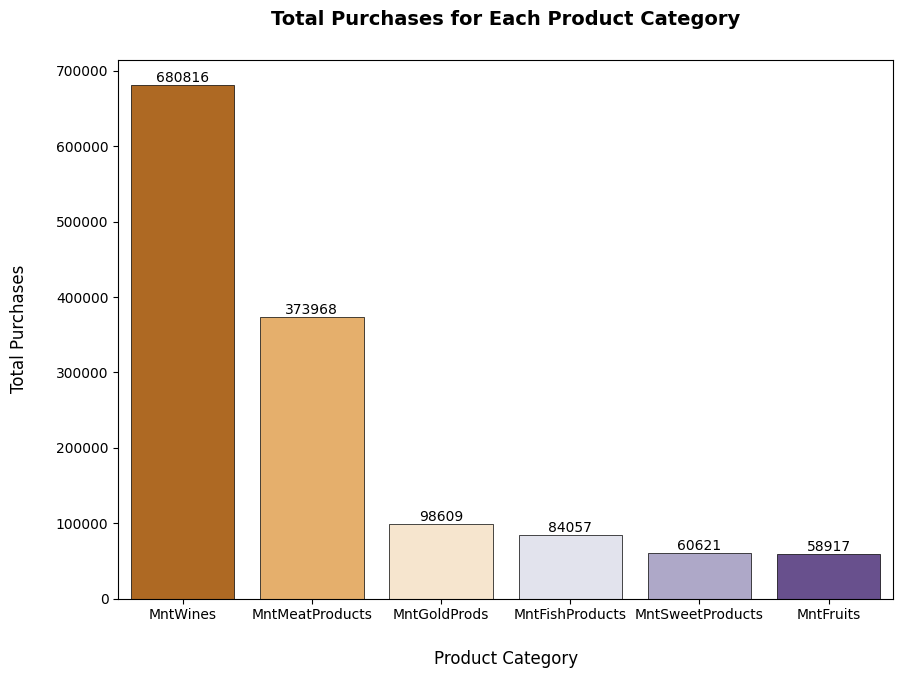

In [72]:
# Create a DataFrame for product categories
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
product_data = data[product_columns]

# Sum up the total purchases for each product category
product_sums = product_data.sum().sort_values(ascending=False)

# Create a bar plot for product categories
plt.figure(figsize=(10, 7))
annot = sns.barplot(x=product_sums.index, y=product_sums.values, palette="PuOr", edgecolor="black", linewidth=0.5)

# Tambahkan anotasi
for p in annot.patches:
    height = p.get_height()
    annot.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Tambahkan judul dan label
plt.title('Total Purchases for Each Product Category', fontsize=14, fontweight='bold', pad=25)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Product Category', fontsize=12, labelpad=20)
plt.ylabel('Total Purchases', fontsize=12, labelpad=20)
plt.show()



The barplot graph above illustrates the total purchases for each product category. The product category with the highest total purchases is MntWines, indicating a high demand for wine products with a purchase count of `680816`. MntMeatProducts follows in second place with a purchase count of `373968`, indicating that meat products are also in high demand. In third place is MntGoldProducts with `98609` purchases, followed by MntFishProducts and MntSweetProducts which have slightly lower purchase totals of `84057` and `60621` purchases. The product category with the lowest total purchases was MntFruits with `58917` of purchases. This data indicates that wine and meat products are the most popular, while fruits are less popular among consumers.

### 2. What factors influence purchasing decisions by product category by customers?

To determine the factors that most influence purchase decisions by product category by customers, we need to look at the relationship between variables such as age, income, marital status, education, number of children and youth with various product categories.

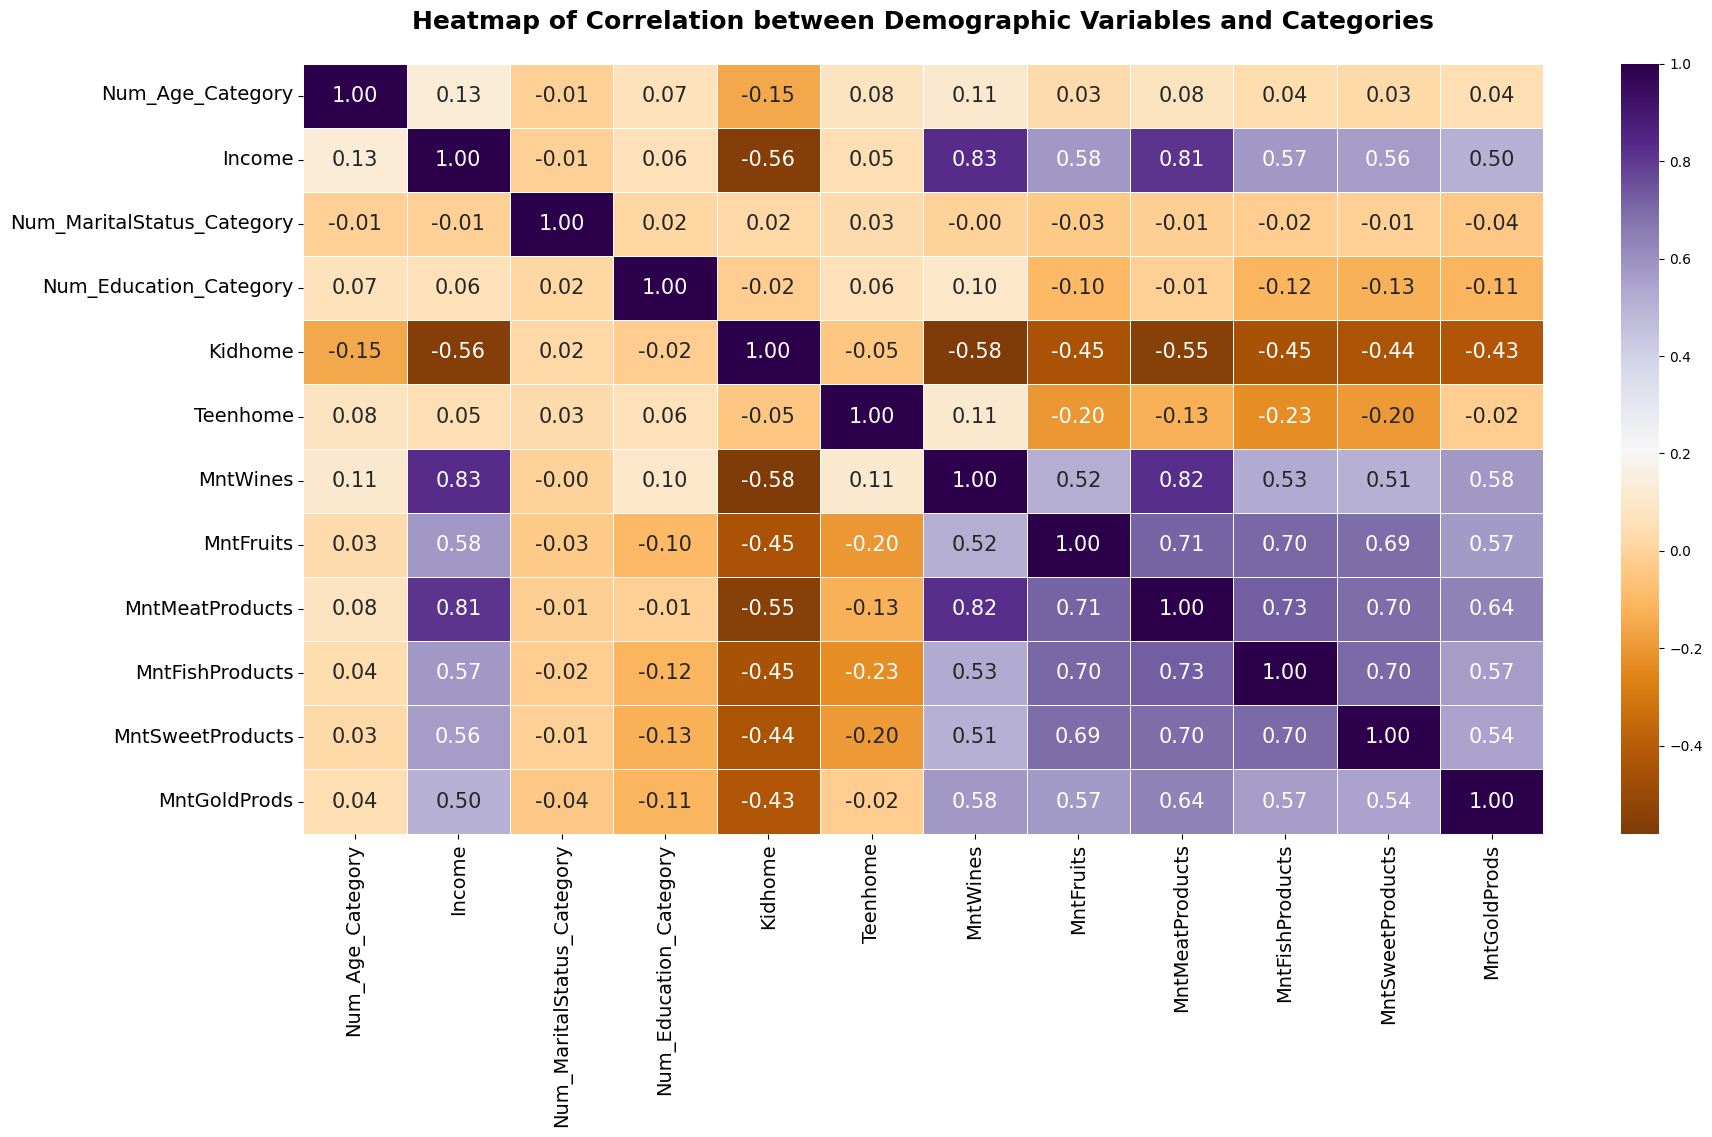

In [73]:
dfCorr = df[['Num_Age_Category', 'Income', 'Num_MaritalStatus_Category', 'Num_Education_Category', 'Kidhome', 'Teenhome',  
             'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

# Calculate the correlation matrix
correlation_matrix = dfCorr.corr(method='spearman')

# Set the size and appearance of the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 15}, cmap='PuOr', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation between Demographic Variables and Categories', fontsize=18, fontweight='bold', pad=25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Display the heatmap
plt.show()


From the heatmaps analysed, it can be concluded that income is the most significant factor influencing purchasing decisions in all product categories analysed.

### 3. What are the customer patterns based on product category purchases?

- Customer Patterns by Categorising Income towards product category purchases

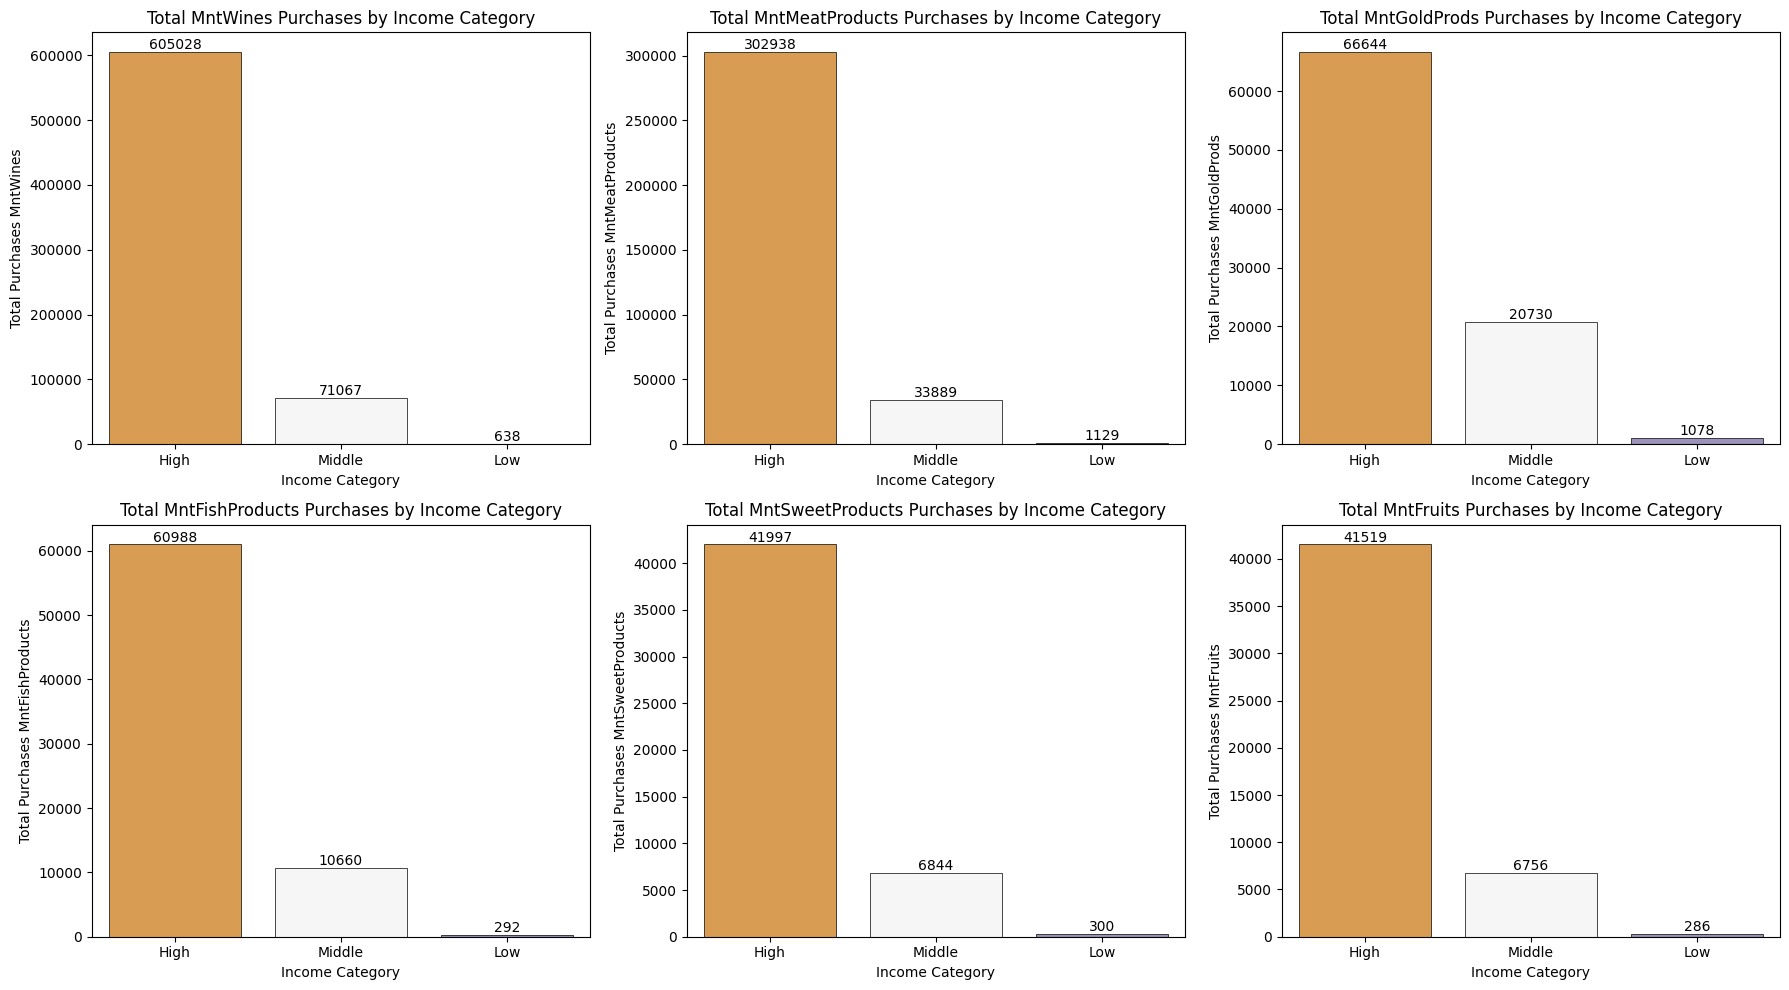

In [74]:
# List of product categories for subplots
product_columns = ['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts', 'MntSweetProducts', 'MntFruits']

# Create figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the array for easier access to subplots

# Iterate through product categories and subplots
for i, cols in enumerate(product_columns):
    ax = axes[i]
    
    # Create barplot
    sns.barplot(data=df, x='Income_Category', y=cols, estimator=sum, ci=None, ax=ax, palette="PuOr", edgecolor="black", linewidth=0.5)
    
    # Add annotations
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.0f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', 
                    va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points')
    
    # Add title and labels to each subplot
    ax.set_title(f'Total {cols} Purchases by Income Category')
    ax.set_xlabel('Income Category')
    ax.set_ylabel(f'Total Purchases {cols}')

# Adjust layout
plt.tight_layout()
plt.show()


The analysis shows that people with high incomes tend to spend more money on all kinds of product categories such as wine, fruits, meat, fish, sweets and gold jewellery. In contrast, those with middle or low incomes generally buy fewer of these products. These findings suggest that a person's income affects how much they buy. People with higher incomes usually have more money to spend and tend to spend more on consumer goods. In other words, financial capability plays a big role in how much a person spends, and a higher income often means greater spending on various products.

- Age Categorised Customer Patterns towards product category purchases

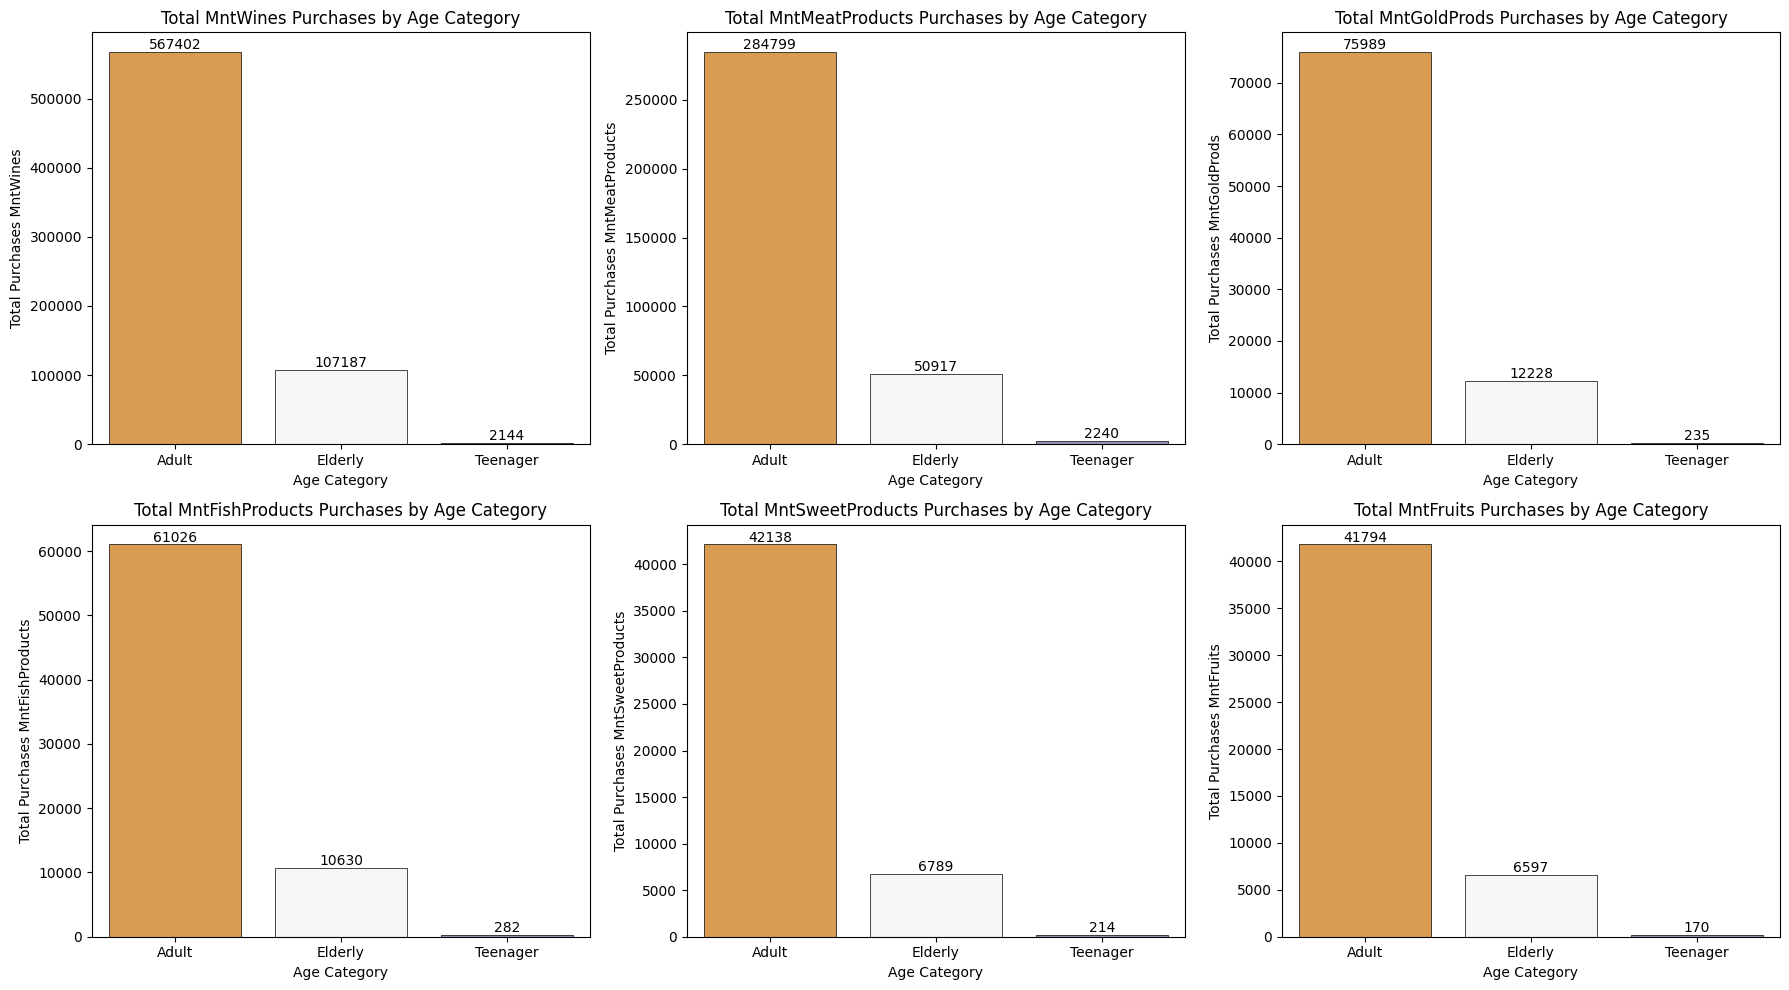

In [75]:
# List of product categories for subplots
product_columns = ['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts', 'MntSweetProducts', 'MntFruits']

# Create figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the array for easier access to subplots

# Iterate through product categories and subplots
for i, cols in enumerate(product_columns):
    ax = axes[i]
    
    # Create barplot
    sns.barplot(data=df, x='Age_Category', y=cols, estimator=sum, ci=None, ax=ax, palette="PuOr", edgecolor="black", linewidth=0.5)
    
    # Add annotations
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.0f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', 
                    va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points')
    
    # Add title and labels to each subplot
    ax.set_title(f'Total {cols} Purchases by Age Category')
    ax.set_xlabel('Age Category')
    ax.set_ylabel(f'Total Purchases {cols}')

# Adjust layout
plt.tight_layout()
plt.show()


The `Adult` category consistently showed the highest purchase levels across the product categories analysed, including wine, fruits, meat products, fish products, sweet products and gold products. In all of these categories, the 'Adult' age group not only leads in terms of absolute number of purchases, but also stands out as the primary consumer, with total expenditure far surpassing other age categories. This shows that the `Adult` category has the most intensive and dominant spending habits across the different types of products available.

- Customer patterns based on marital status towards purchasing product categories

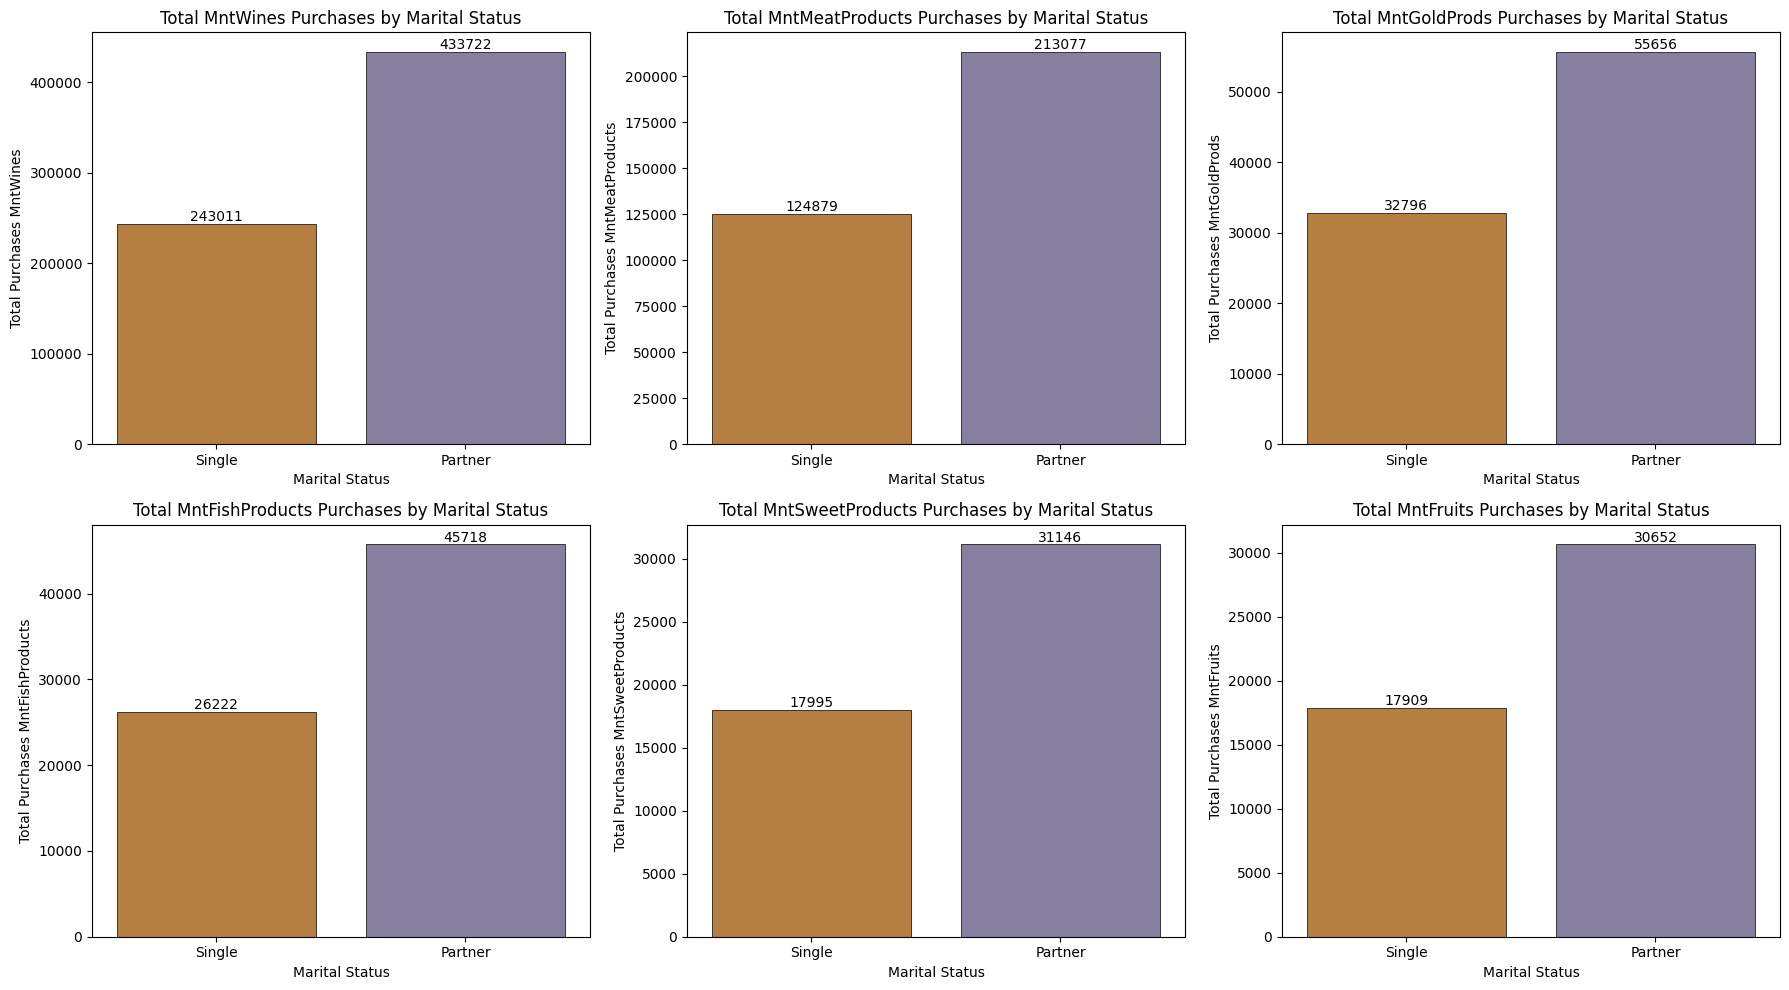

In [76]:
# List of product categories for subplots
product_columns = ['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts', 'MntSweetProducts', 'MntFruits']

# Create figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the array for easier access to subplots

# Iterate through product categories and subplots
for i, cols in enumerate(product_columns):
    ax = axes[i]
    
    # Create barplot
    sns.barplot(data=df, x='Marital_Status', y=cols, estimator=sum, ci=None, ax=ax, palette=['#c7802d', '#847aa5'], edgecolor="black", linewidth=0.5)
    
    # Add annotations
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.0f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', 
                    va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points')
    
    # Add title and labels to each subplot
    ax.set_title(f'Total {cols} Purchases by Marital Status')
    ax.set_xlabel('Marital Status')
    ax.set_ylabel(f'Total Purchases {cols}')

# Adjust layout
plt.tight_layout()
plt.show()


Analysis of the data shows that people who are partner or have a spouse consistently spend more on all types of products, including wine, fruits, meat, fish, sweets and gold jewellery. This means they buy more products compared to people who are single or divorced, suggesting that 'partner' marital status correlates with higher spending across different product categories.

- Customer pattern based on education level towards product category purchase

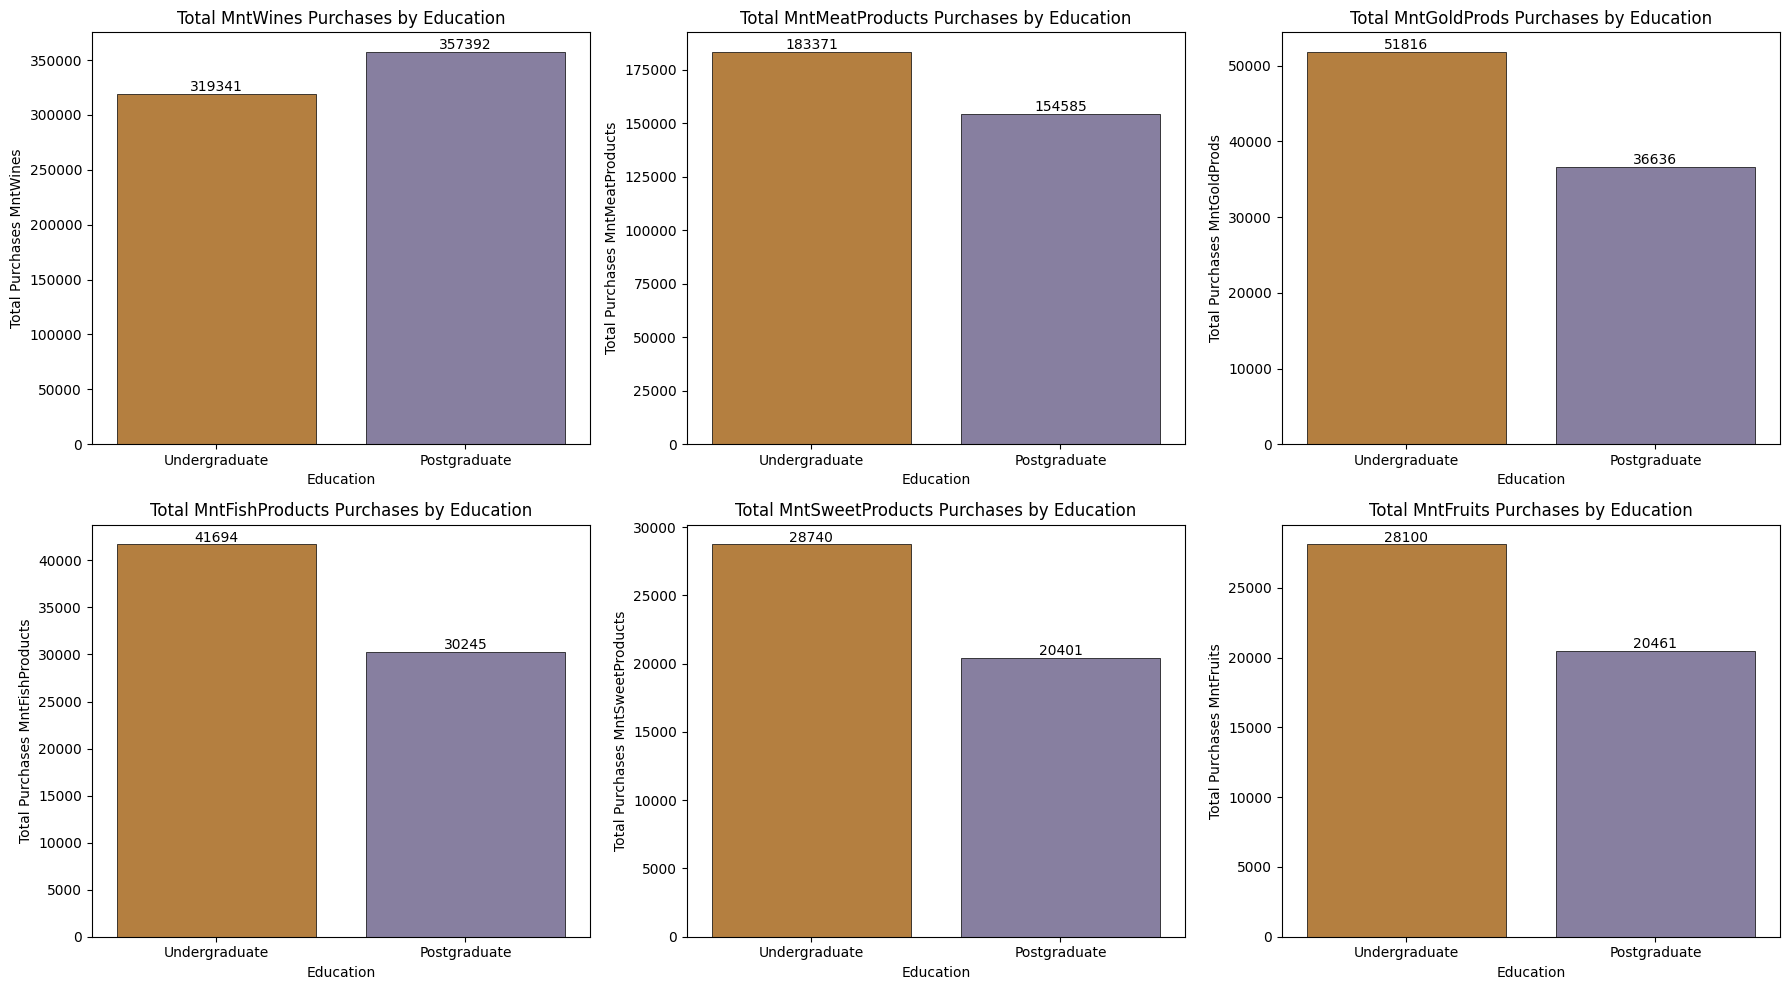

In [77]:
# List of product categories for subplots
product_columns = ['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts', 'MntSweetProducts', 'MntFruits']

# Create figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the array for easier access to subplots

# Iterate through product categories and subplots
for i, cols in enumerate(product_columns):
    ax = axes[i]
    
    # Create barplot
    sns.barplot(data=df, x='Education', y=cols, estimator=sum, ci=None, ax=ax, palette=['#c7802d', '#847aa5'], edgecolor="black", linewidth=0.5)
    
    # Add annotations
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.0f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', 
                    va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points')
    
    # Add title and labels to each subplot
    ax.set_title(f'Total {cols} Purchases by Education')
    ax.set_xlabel('Education')
    ax.set_ylabel(f'Total Purchases {cols}')

# Adjust layout
plt.tight_layout()
plt.show()


The data analysis shows that individuals with an 'undergraduate' education category recorded the highest purchase rates in almost all product categories analysed, such as fruits, meat, fish, sweets and gold jewellery. This suggests that this group tends to spend more money on different types of products than the 'Postgraduate'. However, there was an exception in the 'wine' category, where individuals with a 'postgraduate' education recorded higher purchases compared to those with undergraduate status. In other words, while the undergraduate group generally showed higher spending patterns across most product categories, the postgraduate group seemed to have a tendency to spend more specifically in the wine category.

- Customer pattern based on number of children towards purchasing product category

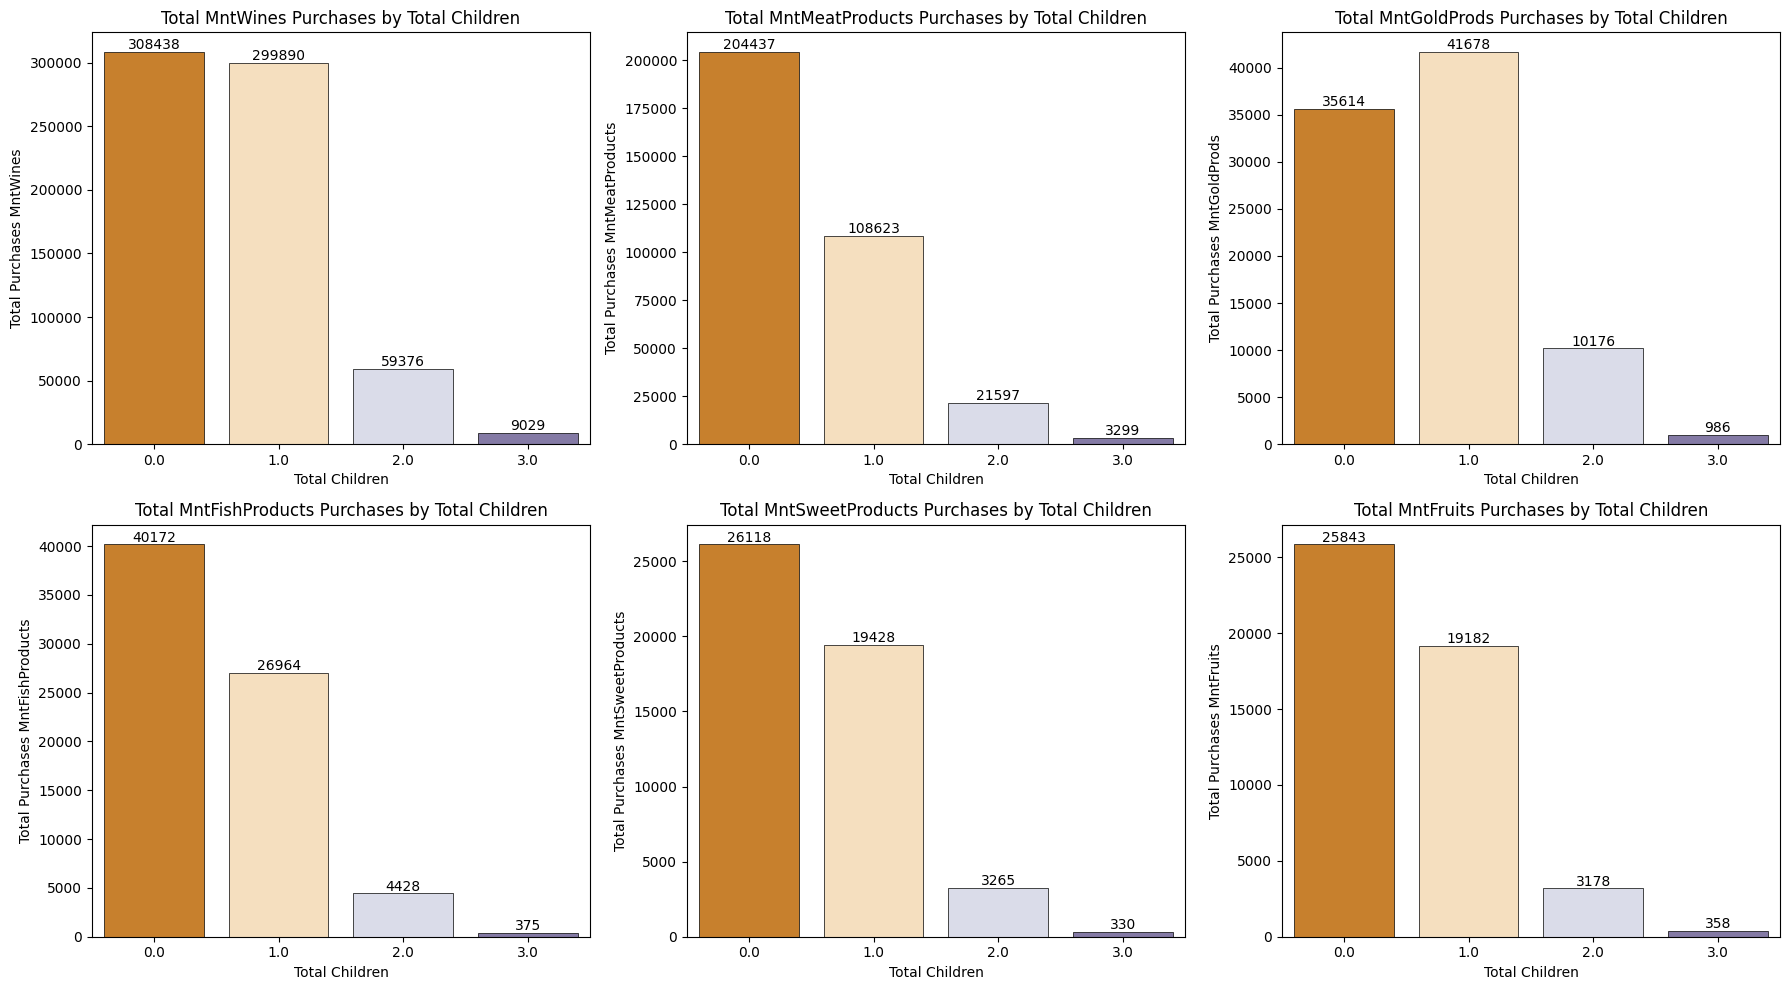

In [78]:
# List of product categories for subplots
product_columns = ['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts', 'MntSweetProducts', 'MntFruits']

# Create figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the array for easier access to subplots

# Iterate through product categories and subplots
for i, cols in enumerate(product_columns):
    ax = axes[i]
    
    # Create barplot
    sns.barplot(data=df, x='Totalchildren', y=cols, estimator=sum, ci=None, ax=ax, palette='PuOr', edgecolor="black", linewidth=0.5)
    
    # Add annotations
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.0f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', 
                    va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points')
    
    # Add title and labels to each subplot
    ax.set_title(f'Total {cols} Purchases by Total Children')
    ax.set_xlabel('Total Children')
    ax.set_ylabel(f'Total Purchases {cols}')

# Adjust layout
plt.tight_layout()
plt.show()


The data shows that people who do not have children usually buy more in almost all product categories. However, those with one child tend to buy more in the gold product category compared to those who are childless or have 2 or more children. 

### 4. How is the effectiveness of current promotions towards increasing sales of specific products?

Before evaluating the effectiveness of a promotion in increasing sales of a particular product, first examine the number of customers who received the campaign compared to those who did not receive it.

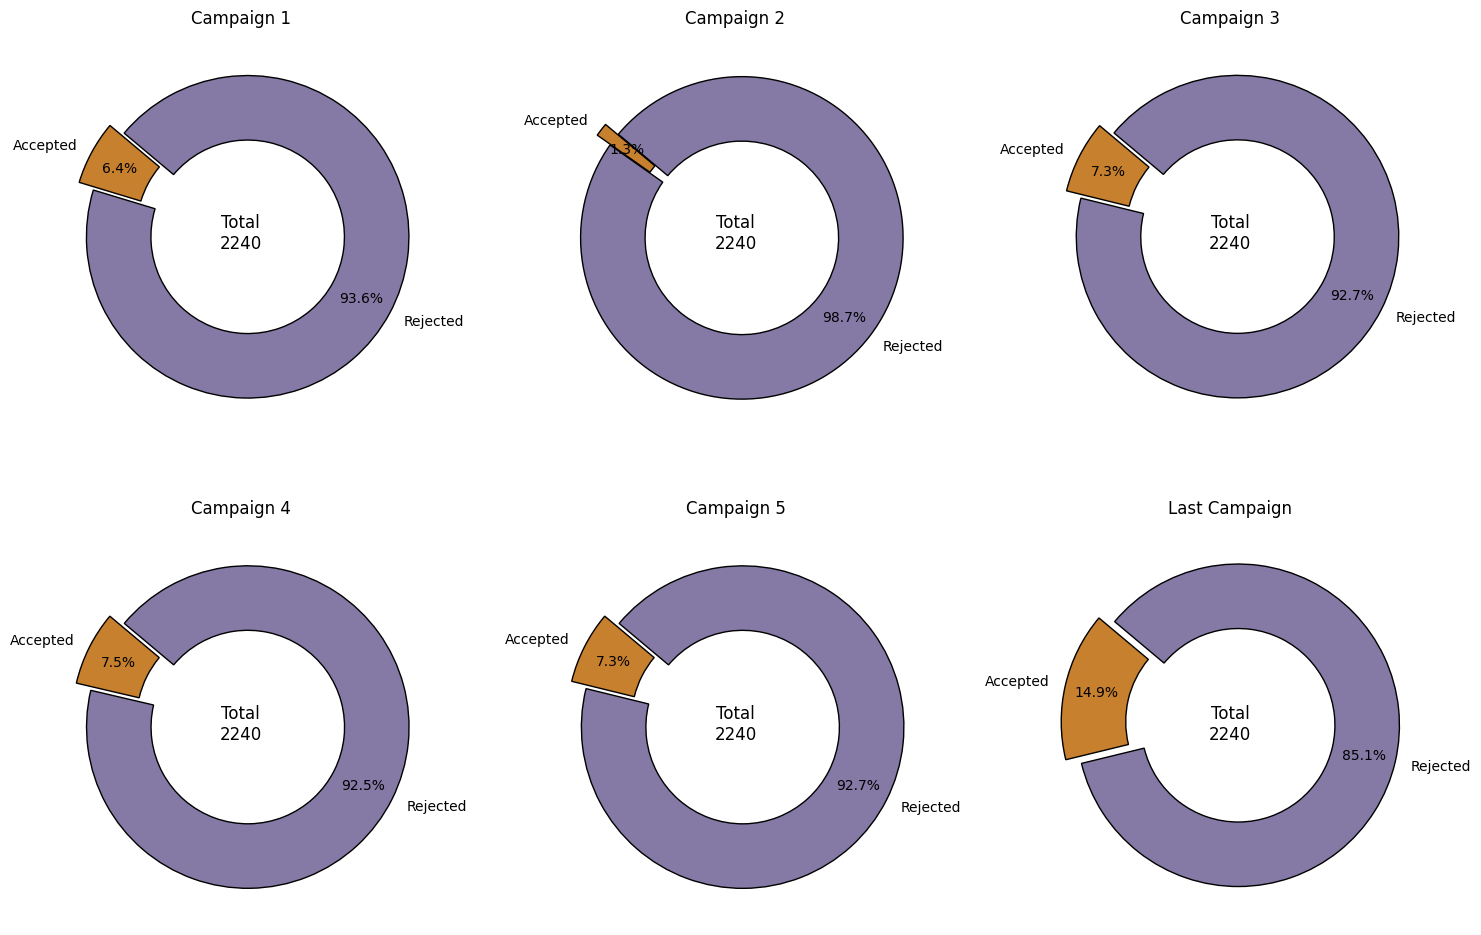

In [79]:
# Calculate the total count
total_count = len(df)

# Columns to plot
columns_to_plot = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
titles = ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Last Campaign']

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

colors = ['#c7802d', '#847aa5']

for i, ax in enumerate(axs):
    column = columns_to_plot[i]
    title = titles[i]
    
    # Calculate the number of people who accepted and rejected the campaign
    accepted = df[column].sum()
    rejected = total_count - accepted
    sizes = [accepted, rejected]
    labels = ['Accepted', 'Rejected']
    
    # Create pie chart
    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=140,
        pctdistance=0.8,
        explode=(0.05, 0.05),
        wedgeprops=dict(width=0.4, edgecolor="black", linewidth=1)
    )
    
    # Add title
    ax.set_title(title)

    # Add total count text in the center of the pie chart
    ax.text(0, 0, f'Total\n{total_count}', ha='center', va='center', fontsize=12, color='black')
    
    # Adjust the size and color of percentage labels
    for text in autotexts:
        text.set_size(10)
        text.set_color('black')

# Adjust layout
plt.tight_layout()
plt.show()


The acceptance rate for campaigns 1 to 5 varied between 1.3% and 7.5%. Campaign 2 had the lowest acceptance rate at 1.3%, while Campaign 4 recorded the highest acceptance rate at 7.5%. On the other hand, the Final Campaign showed the highest acceptance rate among all campaigns, at 14.9%.

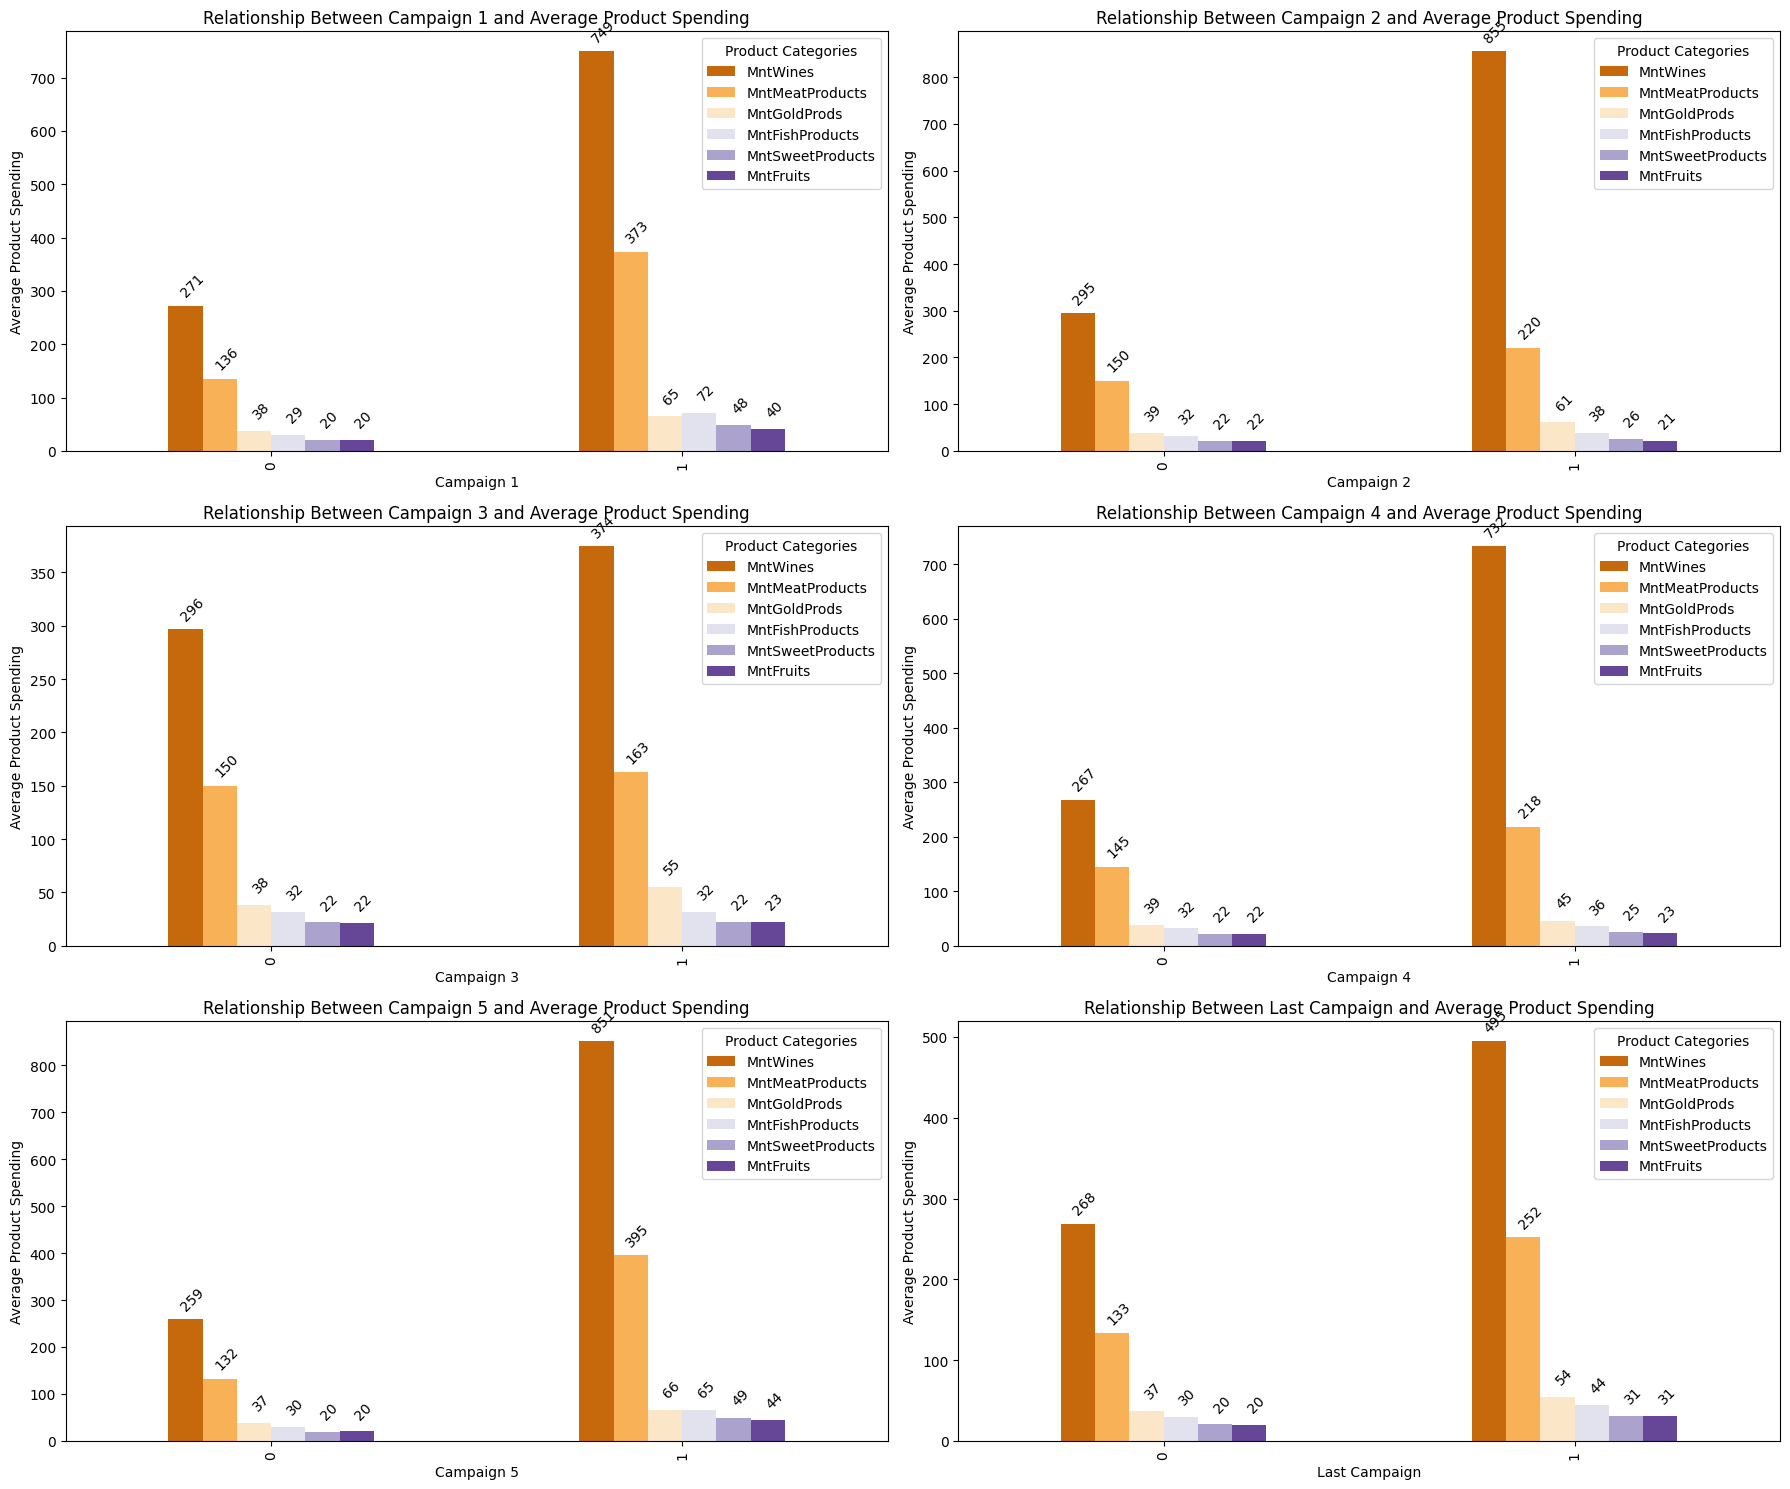

In [80]:
# List of promotion acceptance columns, titles, and product categories
promotions = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
titles = ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Last Campaign']
product_categories = ['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts', 'MntSweetProducts', 'MntFruits']

# Calculate the average spending for each product category based on promotion acceptance
promotion_effectiveness = {}

# Calculate average spending for each promotion
for promo in promotions:
    promo_effect = df.groupby(promo)[product_categories].mean()
    promotion_effectiveness[promo] = promo_effect

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 15))  # 3 rows, 2 columns
axes = axes.flatten()

# Get the 'PuOr' color palette from seaborn
colors = sns.color_palette('PuOr', n_colors=len(product_categories))

for idx, promo in enumerate(promotions):
    ax = axes[idx]
    
    # Convert promotion data to DataFrame for each product
    promo_effects = pd.DataFrame({
        'MntWines': promotion_effectiveness[promo]['MntWines'],
        'MntMeatProducts': promotion_effectiveness[promo]['MntMeatProducts'],
        'MntGoldProds': promotion_effectiveness[promo]['MntGoldProds'],
        'MntFishProducts': promotion_effectiveness[promo]['MntFishProducts'],
        'MntSweetProducts': promotion_effectiveness[promo]['MntSweetProducts'],
        'MntFruits': promotion_effectiveness[promo]['MntFruits']
    })
    
    # Plot bar chart with color palette
    promo_effects.plot(kind='bar', ax=ax, color=colors)
    
    # Add annotations to each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center',
                    xytext=(5, 15),
                    textcoords='offset points',
                    rotation=45)

    ax.set_title(f'Relationship Between {titles[idx]} and Average Product Spending')
    ax.set_xlabel(f'{titles[idx]}')
    ax.set_ylabel('Average Product Spending')
    
    # Set legend with product labels
    ax.legend(title='Product Categories')

plt.tight_layout()
plt.show()


The analysis showed that each marketing campaign successfully increased the average spend of the product categories, with significant increases across all campaigns. The largest increases were seen in the wine and meat product categories, demonstrating the effectiveness of the campaigns in increasing average spend in those categories.

<a id="numerical"></a>
# <b>Section 5 | Conclusion & Recommendation</span></b>

____


### Conclusion

1- **Best Selling Product Categories:**
   - The product category with the highest total purchases is **wines** (MntWines), followed by **meat products** (MntMeatProducts) and **gold products** (MntGoldProds). The **fruits** (MntFruits) category has the lowest total purchases.

2- **Factors that Influence Purchasing Decisions:**
   - **Income** is the most significant factor influencing purchase decisions across all product categories. Customers with higher incomes tend to spend more on various product categories.
   - Other influencing factors include age, marital status, education level, and number of children, with patterns varying across product categories.

3- **Customer Patterns Based on Product Category Purchases:**
   - Customers with high income and mature age are the primary buyers for almost all product categories.
   - Individuals with a marital status of 'partner' tend to spend more compared to those who are single or divorced.
   - Individuals with 'undergraduate' education show the highest purchases in most product categories, but for the wine category, 'postgraduate' is more dominant.
   - Customers without children usually buy more in almost all categories, but those with one child tend to buy more gold products.

4- **Promotional Effectiveness:**
   - Current promotional campaigns show an increase in average product category spend, with the most recent campaign being the most effective.
   - The largest increases occurred in the wine and meat categories, signalling that more targeted promotions in these categories could increase sales.

### Recommendations

1- **Focus on Popular Product Categories:**
   - **Strategy:** Pay more attention to the most frequently purchased product categories, namely wine and meat products. Offer attractive promotions and discounts for these categories to boost sales further.
   - **Implementation:** Create special advertising and promotion campaigns for wine and meat products, including bundling with other products to attract shoppers.

2- **Segmentation by Income:**
   - **Strategy:** Personalise offers and promotions based on customer income- For higher income customers, offer premium and exclusive products- For lower income customers, focus on affordable and value-added offers.
   - **Implementation:** Use income data to send special offers and promotions that match the customer's financial means.

3- **Adjust Strategy Based on Age and Marital Status:**
   - **Strategy:** Target special promotions to mature age groups and customers with 'partner' marital status, as they tend to make more purchases.
   - **Implementation:** Create loyalty programmes or exclusive offers for these groups, including additional discounts and special events that match their preferences.

4- **Promotional Campaign Optimisation:**
   - **Strategy:** Increase the frequency and scope of promotional campaigns that have already proven effective, especially those focused on wine and meat.
   - **Implementation:** Use the results of the most effective campaigns as models for future campaigns- Expand campaigns that have high acceptance rates to cover more customers.
   
5· **Evaluation and Adjustment:**
- **Strategy:** Continuously monitor the effectiveness of promotions and sales to assess the impact of the strategies implemented.
- **Implementation:** Conduct periodic evaluations and adjust strategies based on the latest feedback and data. Be sure to measure the achievement of the target of 15% increase in sales and 10% increase in promotion conversions.


By implementing these recommendations, ABC Supermarket can utilise the insights from the analysis to increase product category sales and promotion effectiveness, and achieve desired business targets.